In [1]:
import copy
from seaborn.utils import os, np, plt, pd
import seaborn as sns
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import statsmodels as stat
from scipy import stats
from sklearn import preprocessing as s_prep, metrics as s_mtr, svm, model_selection as s_ms
from sklearn.feature_selection import chi2, f_regression
from sklearn import linear_model as s_lm, model_selection as s_ms
import timeit

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

In [2]:
pd.set_option('display.max_columns', 500,
             'display.precision', 2)

In [3]:
from project_methods import MSc_Proj as proj

In [4]:
sns.set_style('darkgrid')

In [5]:
# file_loc = proj.show_saved_csv()
# display(file_loc)

data_dir = os.getcwd() #'clean_pds//' #[str(k) for k, v in file_loc.items()][0]
display(data_dir)

'W:\\MSc-AIDS-UoH\\Trimester_3\\Submit'

In [6]:
fname = '\\only6_visits.csv'
first6_vis = pd.read_csv(data_dir+fname)
display(first6_vis.info(), first6_vis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Columns: 152 entries, subjid to hd_status_gen
dtypes: float64(105), int64(23), object(24)
memory usage: 1.5+ MB


None

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,behaviour_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,cognitive_score_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,hd_status_gen
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0.0,371.0,734.0,1098.0,1469.0,1911.0,48,49,50,51,52,53,11.0,10.0,21.0,18.0,17.0,28.0,28.0,32.0,45.0,45.0,47.0,60.0,28.0,32.0,45.0,45.0,47.0,60.0,95.0,80.0,75.0,65.0,70.0,65.0,24.0,22.0,20.0,12.0,15.0,7.0,24.0,22.0,20.0,12.0,15.0,7.0,11.0,11.0,11.0,8.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0.0,0.0,0.0,0.0,-1.0,-1.0,2. 40 - 49,2. 40 - 49,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,1.0,1.0,1.0,1.0,1.0,1.0,25.0,15.0,7.0,11.0,6.0,1.0,120.0,84.0,94.0,57.0,27.0,35.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-2.3,-1. decrease,3. full penetrance,2112.0,1,manifest
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41,99.2,97.5,95.9,93.4,96.2,86.6,188.0,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,24.5,0.0,364.0,728.0,1084.0,1448.0,1815.0,64,65,66,67,68,69,8.0,7.0,9.0,13.0,13.0,7.0,20.0,16.0,25.0,32.0,31.0,25.0,20.0,16.0,25.0,32.0,31.0,25.0,90.0,90.0,80.0,80.0,75.0,75.0,25.0,25.0,23.0,22.0,21.0,20.0,25.0,25.0,23.0,22.0,21.0,20.0,13.0,11.0,10.0,9.0,10.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1. normal,1.0,1.0,1.0,1.0,1.0,0.0,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,1.0,2.0,0.0,178.0,142.0,152.0,167.0,139.0,149.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-3.6,-1. decrease,3. full penetrance,2624.0,3,manifes

In [7]:
# include only baseline and last visit variables
display(proj.null_checker(first6_vis, only_nulls=True))
display(proj.get_columns_with_pattern(first6_vis, 'vis_'), first6_vis)

# drop pps with missing variables
first6_vis = first6_vis.dropna().reset_index(drop=True)
# first6_vis = first6_vis.dropna().reset_index(drop=True)
display(proj.null_checker(first6_vis, only_nulls=True))
display(proj.null_checker(first6_vis, only_nulls=True))
display(first6_vis)

# drop all variables at sixth visit
drop_cols = list(proj.get_columns_with_pattern(first6_vis, 'vis_6').columns)
first6_vis = pd.concat([first6_vis.drop(drop_cols, axis=1), first6_vis['bmi_level_vis_6']], axis=1)
display(first6_vis)

Series([], dtype: int64)

,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,behaviour_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,cognitive_score_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6
0,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0.0,371.0,734.0,1098.0,1469.0,1911.0,48,49,50,51,52,53,11.0,10.0,21.0,18.0,17.0,28.0,28.0,32.0,45.0,45.0,47.0,60.0,28.0,32.0,45.0,45.0,47.0,60.0,95.0,80.0,75.0,65.0,70.0,65.0,24.0,22.0,20.0,12.0,15.0,7.0,24.0,22.0,20.0,12.0,15.0,7.0,11.0,11.0,11.0,8.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0.0,0.0,0.0,0.0,-1.0,-1.0,2. 40 - 49,2. 40 - 49,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,1.0,1.0,1.0,1.0,1.0,1.0,25.0,15.0,7.0,11.0,6.0,1.0,120.0,84.0,94.0,57.0,27.0,35.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest
1,99.2,97.5,95.9,93.4,96.2,86.6,188.0,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,24.5,0.0,364.0,728.0,1084.0,1448.0,1815.0,64,65,66,67,68,69,8.0,7.0,9.0,13.0,13.0,7.0,20.0,16.0,25.0,32.0,31.0,25.0,20.0,16.0,25.0,32.0,31.0,25.0,90.0,90.0,80.0,80.0,75.0,75.0,25.0,25.0,23.0,22.0,21.0,20.0,25.0,25.0,23.0,22.0,21.0,20.0,13.0,11.0,10.0,9.0,10.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1. normal,1.0,1.0,1.0,1.0,1.0,0.0,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,1.0,2.0,0.0,178.0,142.0,152.0,167.0,139.0,149.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest
2,60.0,52.0,61.0,59.0,63.5,70.2,170.0,170.0,170.0,170.0,170.0,170.0,20.8,18.0,21.1,20.4,22.0,24.3,0.0,392.0,707.0,1160.0,1566.0,1881.0,51,52,53,54,55,56,22.0,23.0,21.0,26.0,27.0,22.0,109.0,112.0,112.0,120.0,122.0,116.0,109.0,112.0,112.0,120.0,122.0,116.0,20.0,25.0,25.0,15.0,20.0,10.0,3.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1. normal,0. underweight,1. normal,1. normal,1. normal,1. normal,0.0,-1.0,0.0,0.0,0.0,0.0,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,12.0,20.0,24.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest
3,58.0,59.1

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,behaviour_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,cognitive_score_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,hd_status_gen
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0.0,371.0,734.0,1098.0,1469.0,1911.0,48,49,50,51,52,53,11.0,10.0,21.0,18.0,17.0,28.0,28.0,32.0,45.0,45.0,47.0,60.0,28.0,32.0,45.0,45.0,47.0,60.0,95.0,80.0,75.0,65.0,70.0,65.0,24.0,22.0,20.0,12.0,15.0,7.0,24.0,22.0,20.0,12.0,15.0,7.0,11.0,11.0,11.0,8.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0.0,0.0,0.0,0.0,-1.0,-1.0,2. 40 - 49,2. 40 - 49,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,1.0,1.0,1.0,1.0,1.0,1.0,25.0,15.0,7.0,11.0,6.0,1.0,120.0,84.0,94.0,57.0,27.0,35.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-2.3,-1. decrease,3. full penetrance,2112.0,1,manifest
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41,99.2,97.5,95.9,93.4,96.2,86.6,188.0,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,24.5,0.0,364.0,728.0,1084.0,1448.0,1815.0,64,65,66,67,68,69,8.0,7.0,9.0,13.0,13.0,7.0,20.0,16.0,25.0,32.0,31.0,25.0,20.0,16.0,25.0,32.0,31.0,25.0,90.0,90.0,80.0,80.0,75.0,75.0,25.0,25.0,23.0,22.0,21.0,20.0,25.0,25.0,23.0,22.0,21.0,20.0,13.0,11.0,10.0,9.0,10.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1. normal,1.0,1.0,1.0,1.0,1.0,0.0,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,1.0,2.0,0.0,178.0,142.0,152.0,167.0,139.0,149.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-3.6,-1. decrease,3. full penetrance,2624.0,3,manifes

Series([], dtype: int64)

Series([], dtype: int64)

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,behaviour_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,cognitive_score_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,hd_status_gen
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0.0,371.0,734.0,1098.0,1469.0,1911.0,48,49,50,51,52,53,11.0,10.0,21.0,18.0,17.0,28.0,28.0,32.0,45.0,45.0,47.0,60.0,28.0,32.0,45.0,45.0,47.0,60.0,95.0,80.0,75.0,65.0,70.0,65.0,24.0,22.0,20.0,12.0,15.0,7.0,24.0,22.0,20.0,12.0,15.0,7.0,11.0,11.0,11.0,8.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0.0,0.0,0.0,0.0,-1.0,-1.0,2. 40 - 49,2. 40 - 49,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,1.0,1.0,1.0,1.0,1.0,1.0,25.0,15.0,7.0,11.0,6.0,1.0,120.0,84.0,94.0,57.0,27.0,35.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-2.3,-1. decrease,3. full penetrance,2112.0,1,manifest
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41,99.2,97.5,95.9,93.4,96.2,86.6,188.0,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,24.5,0.0,364.0,728.0,1084.0,1448.0,1815.0,64,65,66,67,68,69,8.0,7.0,9.0,13.0,13.0,7.0,20.0,16.0,25.0,32.0,31.0,25.0,20.0,16.0,25.0,32.0,31.0,25.0,90.0,90.0,80.0,80.0,75.0,75.0,25.0,25.0,23.0,22.0,21.0,20.0,25.0,25.0,23.0,22.0,21.0,20.0,13.0,11.0,10.0,9.0,10.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1. normal,1.0,1.0,1.0,1.0,1.0,0.0,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,1.0,2.0,0.0,178.0,142.0,152.0,167.0,139.0,149.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-3.6,-1. decrease,3. full penetrance,2624.0,3,manifes

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,hd_status_gen,bmi_level_vis_6
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44,67.9,67.2,65.4,63.8,62.5,185.4,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,0.0,371.0,734.0,1098.0,1469.0,48,49,50,51,52,11.0,10.0,21.0,18.0,17.0,28.0,32.0,45.0,45.0,47.0,28.0,32.0,45.0,45.0,47.0,95.0,80.0,75.0,65.0,70.0,24.0,22.0,20.0,12.0,15.0,24.0,22.0,20.0,12.0,15.0,11.0,11.0,11.0,8.0,6.0,1.0,1.0,1.0,1.0,1.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0.0,0.0,0.0,0.0,-1.0,2. 40 - 49,2. 40 - 49,3. 50 - 59,3. 50 - 59,3. 50 - 59,1.0,1.0,1.0,1.0,1.0,25.0,15.0,7.0,11.0,6.0,120.0,84.0,94.0,57.0,27.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-2.3,-1. decrease,3. full penetrance,2112.0,1,manifest,0. underweight
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41,99.2,97.5,95.9,93.4,96.2,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,0.0,364.0,728.0,1084.0,1448.0,64,65,66,67,68,8.0,7.0,9.0,13.0,13.0,20.0,16.0,25.0,32.0,31.0,20.0,16.0,25.0,32.0,31.0,90.0,90.0,80.0,80.0,75.0,25.0,25.0,23.0,22.0,21.0,25.0,25.0,23.0,22.0,21.0,13.0,11.0,10.0,9.0,10.0,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,1.0,2.0,178.0,142.0,152.0,167.0,139.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-3.6,-1. decrease,3. full penetrance,2624.0,3,manifest,1. normal
2,R000458994,1,37.0,1,45.0,1,47.0,1,41.0,5.1,3.5,1.0,33,[3.0 to 4.0),1,6,3. manifest,1,0,1,1,1,0,0,17,45,60.0,52.0,61.0,59.0,63.5,170.0,170.0,170.0,170.0,170.0,20.8,18.0,21.1,20.4,22.0,0.0,392.0,707.0,1160.0,1566.0,51,52,53,54,55,22.0,23.0,21.0,26.0,27.0,109.0,112.0,112.0,120.0,122.0,109.0,112.0,112.0,120.0,122.0,20.0,25.0,25.0,15.0,20.0,3.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1. normal,0. underweight,1. normal,1. normal,1. normal,0.0,-1.0,0.0,0.0,0.0,3. 50 - 5

#### Only keep baseline age 

In [8]:
drop_cols = [c  for c in list(proj.get_columns_with_pattern(first6_vis, 
                                                            ['age_vis', 'age_bucket']).columns) if c[-1] != '1']

first6_vis = first6_vis.drop(drop_cols, axis=1)
display(drop_cols, first6_vis)

['age_vis_2',
 'age_vis_3',
 'age_vis_4',
 'age_vis_5',
 'age_bucket_vis_2',
 'age_bucket_vis_3',
 'age_bucket_vis_4',
 'age_bucket_vis_5']

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,age_vis_1,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,age_bucket_vis_1,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,hd_status_gen,bmi_level_vis_6
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44,67.9,67.2,65.4,63.8,62.5,185.4,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,0.0,371.0,734.0,1098.0,1469.0,48,11.0,10.0,21.0,18.0,17.0,28.0,32.0,45.0,45.0,47.0,28.0,32.0,45.0,45.0,47.0,95.0,80.0,75.0,65.0,70.0,24.0,22.0,20.0,12.0,15.0,24.0,22.0,20.0,12.0,15.0,11.0,11.0,11.0,8.0,6.0,1.0,1.0,1.0,1.0,1.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0.0,0.0,0.0,0.0,-1.0,2. 40 - 49,1.0,1.0,1.0,1.0,1.0,25.0,15.0,7.0,11.0,6.0,120.0,84.0,94.0,57.0,27.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-2.3,-1. decrease,3. full penetrance,2112.0,1,manifest,0. underweight
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41,99.2,97.5,95.9,93.4,96.2,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,0.0,364.0,728.0,1084.0,1448.0,64,8.0,7.0,9.0,13.0,13.0,20.0,16.0,25.0,32.0,31.0,20.0,16.0,25.0,32.0,31.0,90.0,90.0,80.0,80.0,75.0,25.0,25.0,23.0,22.0,21.0,25.0,25.0,23.0,22.0,21.0,13.0,11.0,10.0,9.0,10.0,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,1.0,2.0,178.0,142.0,152.0,167.0,139.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-3.6,-1. decrease,3. full penetrance,2624.0,3,manifest,1. normal
2,R000458994,1,37.0,1,45.0,1,47.0,1,41.0,5.1,3.5,1.0,33,[3.0 to 4.0),1,6,3. manifest,1,0,1,1,1,0,0,17,45,60.0,52.0,61.0,59.0,63.5,170.0,170.0,170.0,170.0,170.0,20.8,18.0,21.1,20.4,22.0,0.0,392.0,707.0,1160.0,1566.0,51,22.0,23.0,21.0,26.0,27.0,109.0,112.0,112.0,120.0,122.0,109.0,112.0,112.0,120.0,122.0,20.0,25.0,25.0,15.0,20.0,3.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1. normal,0. underweight,1. normal,1. normal,1. normal,0.0,-1.0,0.0,0.0,0.0,3. 50 - 59,0.0,0.0,0.0,0.0,0.0,0.0,24.0,12.0,20.0,24.0,0.0,0.0,0.0,0.0,0.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3.5,1. increase,3. full penetrance,2295.0,4,manifest,1. normal
3,R001225384,1,45.0,1,44.0,0,0.0,1,45.0,5.2

#### Only keep baseline hd_status 

In [9]:
drop_cols = [c for c in list(proj.get_columns_with_pattern(first6_vis, 'hd_status').columns) if c[-1] != '1']
first6_vis = first6_vis.drop(drop_cols, axis=1)
display(drop_cols, first6_vis)

['hd_status0',
 'hd_status_vis_2',
 'hd_status_vis_3',
 'hd_status_vis_4',
 'hd_status_vis_5',
 'hd_status_gen']

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,age_vis_1,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,age_bucket_vis_1,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,hd_status_vis_1,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,bmi_level_vis_6
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,1,0,1,1,0,0,1,19,44,67.9,67.2,65.4,63.8,62.5,185.4,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,0.0,371.0,734.0,1098.0,1469.0,48,11.0,10.0,21.0,18.0,17.0,28.0,32.0,45.0,45.0,47.0,28.0,32.0,45.0,45.0,47.0,95.0,80.0,75.0,65.0,70.0,24.0,22.0,20.0,12.0,15.0,24.0,22.0,20.0,12.0,15.0,11.0,11.0,11.0,8.0,6.0,1.0,1.0,1.0,1.0,1.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0.0,0.0,0.0,0.0,-1.0,2. 40 - 49,1.0,1.0,1.0,1.0,1.0,25.0,15.0,7.0,11.0,6.0,120.0,84.0,94.0,57.0,27.0,3. manifest,-2.3,-1. decrease,3. full penetrance,2112.0,1,0. underweight
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,1,0,1,0,0,0,1,22,41,99.2,97.5,95.9,93.4,96.2,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,0.0,364.0,728.0,1084.0,1448.0,64,8.0,7.0,9.0,13.0,13.0,20.0,16.0,25.0,32.0,31.0,20.0,16.0,25.0,32.0,31.0,90.0,90.0,80.0,80.0,75.0,25.0,25.0,23.0,22.0,21.0,25.0,25.0,23.0,22.0,21.0,13.0,11.0,10.0,9.0,10.0,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,1.0,2.0,178.0,142.0,152.0,167.0,139.0,3. manifest,-3.6,-1. decrease,3. full penetrance,2624.0,3,1. normal
2,R000458994,1,37.0,1,45.0,1,47.0,1,41.0,5.1,3.5,1.0,33,[3.0 to 4.0),1,6,1,0,1,1,1,0,0,17,45,60.0,52.0,61.0,59.0,63.5,170.0,170.0,170.0,170.0,170.0,20.8,18.0,21.1,20.4,22.0,0.0,392.0,707.0,1160.0,1566.0,51,22.0,23.0,21.0,26.0,27.0,109.0,112.0,112.0,120.0,122.0,109.0,112.0,112.0,120.0,122.0,20.0,25.0,25.0,15.0,20.0,3.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1. normal,0. underweight,1. normal,1. normal,1. normal,0.0,-1.0,0.0,0.0,0.0,3. 50 - 59,0.0,0.0,0.0,0.0,0.0,0.0,24.0,12.0,20.0,24.0,0.0,0.0,0.0,0.0,0.0,3. manifest,3.5,1. increase,3. full penetrance,2295.0,4,1. normal
3,R001225384,1,45.0,1,44.0,0,0.0,1,45.0,5.2,3.5,1.0,33,[3.0 to 4.0),1,6,1,0,0,0,0,0,1,17,41,58.0,59.1,64.1,69.1,71.0,172.0,172.0,172.0,172.0,172.0,19.6,20.0,21.7,23.4,24.0,0.0,441.0,878.0,1240.0,1512.0,48,3.0,7.0,7.0,8.0,5.0,6.0,12.0,17.0,14.0,10.0,6.0,12.0,17.0,14.0,10.0,100.0,90.0,75.0,75.0,75.0,23.0,23.0,19.0,19.0,19.0,23.0,23.0,19.0,

### Engineer Combined Scores

In [10]:
score_cols = ['indepscl'] + list(np.unique([c.split('_vis')[0] for c in list(proj.get_columns_with_pattern(first6_vis, 'score').columns)]))
combo = pd.DataFrame()
for col in score_cols:
    if col in ['miscore', 'fiscore']:
        continue
    combo.loc[:, f"combined_{col}"] = proj.get_columns_with_pattern(first6_vis, col).sum(axis=1)
combo

,combined_indepscl,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_fascore,combined_motscore,combined_tfcscore
0,385.0,64.0,77.0,382.0,93.0,197.0,47.0
1,415.0,20.0,50.0,778.0,116.0,124.0,53.0
2,105.0,80.0,119.0,0.0,6.0,575.0,3.0
3,415.0,53.0,30.0,1369.0,103.0,59.0,44.0
4,330.0,79.0,30.0,533.0,64.0,233.0,19.0
...,...,...,...,...,...,...,...
1308,500.0,42.0,27.0,1202.0,124.0,54.0,63.0
1309,500.0,4.0,0.0,1298.0,125.0,13.0,65.0
1310,465.0,120.0,8.0,1153.0,122.0,34.0,54.0
1311,500.0,41.0,0.0,1169.0,121.0,12.0,65.0


In [11]:
# drop uhdrs score variables per visit
drop_cols = list(proj.get_columns_with_pattern(first6_vis, score_cols).columns)
display(drop_cols)
first6_vis = first6_vis.drop(drop_cols, axis=1)
display(first6_vis)

['chorea_score_vis_1',
 'chorea_score_vis_2',
 'chorea_score_vis_3',
 'chorea_score_vis_4',
 'chorea_score_vis_5',
 'motscore_vis_1',
 'motscore_vis_2',
 'motscore_vis_3',
 'motscore_vis_4',
 'motscore_vis_5',
 'miscore_vis_1',
 'miscore_vis_2',
 'miscore_vis_3',
 'miscore_vis_4',
 'miscore_vis_5',
 'indepscl_vis_1',
 'indepscl_vis_2',
 'indepscl_vis_3',
 'indepscl_vis_4',
 'indepscl_vis_5',
 'fiscore_vis_1',
 'fiscore_vis_2',
 'fiscore_vis_3',
 'fiscore_vis_4',
 'fiscore_vis_5',
 'fascore_vis_1',
 'fascore_vis_2',
 'fascore_vis_3',
 'fascore_vis_4',
 'fascore_vis_5',
 'tfcscore_vis_1',
 'tfcscore_vis_2',
 'tfcscore_vis_3',
 'tfcscore_vis_4',
 'tfcscore_vis_5',
 'behaviour_score_vis_1',
 'behaviour_score_vis_2',
 'behaviour_score_vis_3',
 'behaviour_score_vis_4',
 'behaviour_score_vis_5',
 'cognitive_score_vis_1',
 'cognitive_score_vis_2',
 'cognitive_score_vis_3',
 'cognitive_score_vis_4',
 'cognitive_score_vis_5']

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,age_vis_1,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,age_bucket_vis_1,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,hd_status_vis_1,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,bmi_level_vis_6
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,1,0,1,1,0,0,1,19,44,67.9,67.2,65.4,63.8,62.5,185.4,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,0.0,371.0,734.0,1098.0,1469.0,48,1.0,1.0,1.0,1.0,1.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0.0,0.0,0.0,0.0,-1.0,2. 40 - 49,1.0,1.0,1.0,1.0,1.0,3. manifest,-2.3,-1. decrease,3. full penetrance,2112.0,1,0. underweight
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,1,0,1,0,0,0,1,22,41,99.2,97.5,95.9,93.4,96.2,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,0.0,364.0,728.0,1084.0,1448.0,64,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,3. manifest,-3.6,-1. decrease,3. full penetrance,2624.0,3,1. normal
2,R000458994,1,37.0,1,45.0,1,47.0,1,41.0,5.1,3.5,1.0,33,[3.0 to 4.0),1,6,1,0,1,1,1,0,0,17,45,60.0,52.0,61.0,59.0,63.5,170.0,170.0,170.0,170.0,170.0,20.8,18.0,21.1,20.4,22.0,0.0,392.0,707.0,1160.0,1566.0,51,0.0,0.0,0.0,0.0,0.0,1. normal,0. underweight,1. normal,1. normal,1. normal,0.0,-1.0,0.0,0.0,0.0,3. 50 - 59,0.0,0.0,0.0,0.0,0.0,3. manifest,3.5,1. increase,3. full penetrance,2295.0,4,1. normal
3,R001225384,1,45.0,1,44.0,0,0.0,1,45.0,5.2,3.5,1.0,33,[3.0 to 4.0),1,6,1,0,0,0,0,0,1,17,41,58.0,59.1,64.1,69.1,71.0,172.0,172.0,172.0,172.0,172.0,19.6,20.0,21.7,23.4,24.0,0.0,441.0,878.0,1240.0,1512.0,48,1.0,1.0,1.0,1.0,1.0,1. normal,1. normal,1. normal,1. normal,1. normal,0.0,0.0,0.0,0.0,0.0,2. 40 - 49,1.0,1.0,1.0,1.0,1.0,3. manifest,3.5,1. increase,3. full penetrance,1968.0,3,1. normal
4,R00170741X,1,44.0,1,41.0,1,41.0,1,35.0,6.3,-8.4,-1.0,21,[-9.0 to -8.0),1,7,1,0,1,0,0,0,1,18,47,127.0,127.0,129.0,128.0,113.0,186.0,186.0,186.0,186.0,186.0,36.7,36.7,37.3,37.0,32.7,0.0,278.0,648.0,928.0,1236.0,43,1.0,1.0,1.0,1.0,1.0,3. obese,3. obese,3. obese,3. obese,3. obese,1.0,1.0,1.0,1.0,1.0,2. 40 - 49,1.0,1.0,0.0,0.0,0.0,3. manifest,-13.0,-1. decrease,3. full penetrance,2021.0,4,1. normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,R994514445,1,39.0,0,0.0,0,0.0,1,62.0,5.2,0.1,1.0,30,[0.0 to 1.0),1,6,1,0,0,0,0,0,0,18,40,57.2,56.2,57.2,54.4,59.4,158.0,158.0,158.0,158.0,158.0,22.9,22.5,22.9,21.8,23.8,0.0,519.0,876.0,1241.0,1603.0,64,1.0,1.0,1.0,1.0,1.0,1. normal,1. normal,1. normal,1. normal,1. normal,0.0,0.0,0.0,0.0,0.0,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,3. manifest,0.1,1. increase,3. full penetrance,2560.0,2,1. normal
1309,R995458444,1,0.0,0,0.0,0,0.0,1,0.0,4.9,-4.7,-1.0,25,[-5.0 to -4.0),1,6,0,0,0,0,0,0,0,18,20,76.0,69.3,69.9,69.9,68.5,165.0,164.0,163.5,163.0,163.0,27.9,25.8,26.1,26.3,25.8,0.0,358.0,697.0,1061.0,1425.0,72,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. ov

In [12]:
# attach combined scores to first6_vis
first6_vis = pd.merge(first6_vis, combo, left_index=True, right_index=True)
first6_vis

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,age_vis_1,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,age_bucket_vis_1,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,hd_status_vis_1,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,bmi_level_vis_6,combined_indepscl,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_fascore,combined_motscore,combined_tfcscore
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,1,0,1,1,0,0,1,19,44,67.9,67.2,65.4,63.8,62.5,185.4,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,0.0,371.0,734.0,1098.0,1469.0,48,1.0,1.0,1.0,1.0,1.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0.0,0.0,0.0,0.0,-1.0,2. 40 - 49,1.0,1.0,1.0,1.0,1.0,3. manifest,-2.3,-1. decrease,3. full penetrance,2112.0,1,0. underweight,385.0,64.0,77.0,382.0,93.0,197.0,47.0
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,1,0,1,0,0,0,1,22,41,99.2,97.5,95.9,93.4,96.2,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,0.0,364.0,728.0,1084.0,1448.0,64,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,3. manifest,-3.6,-1. decrease,3. full penetrance,2624.0,3,1. normal,415.0,20.0,50.0,778.0,116.0,124.0,53.0
2,R000458994,1,37.0,1,45.0,1,47.0,1,41.0,5.1,3.5,1.0,33,[3.0 to 4.0),1,6,1,0,1,1,1,0,0,17,45,60.0,52.0,61.0,59.0,63.5,170.0,170.0,170.0,170.0,170.0,20.8,18.0,21.1,20.4,22.0,0.0,392.0,707.0,1160.0,1566.0,51,0.0,0.0,0.0,0.0,0.0,1. normal,0. underweight,1. normal,1. normal,1. normal,0.0,-1.0,0.0,0.0,0.0,3. 50 - 59,0.0,0.0,0.0,0.0,0.0,3. manifest,3.5,1. increase,3. full penetrance,2295.0,4,1. normal,105.0,80.0,119.0,0.0,6.0,575.0,3.0
3,R001225384,1,45.0,1,44.0,0,0.0,1,45.0,5.2,3.5,1.0,33,[3.0 to 4.0),1,6,1,0,0,0,0,0,1,17,41,58.0,59.1,64.1,69.1,71.0,172.0,172.0,172.0,172.0,172.0,19.6,20.0,21.7,23.4,24.0,0.0,441.0,878.0,1240.0,1512.0,48,1.0,1.0,1.0,1.0,1.0,1. normal,1. normal,1. normal,1. normal,1. normal,0.0,0.0,0.0,0.0,0.0,2. 40 - 49,1.0,1.0,1.0,1.0,1.0,3. manifest,3.5,1. increase,3. full penetrance,1968.0,3,1. normal,415.0,53.0,30.0,1369.0,103.0,59.0,44.0
4,R00170741X,1,44.0,1,41.0,1,41.0,1,35.0,6.3,-8.4,-1.0,21,[-9.0 to -8.0),1,7,1,0,1,0,0,0,1,18,47,127.0,127.0,129.0,128.0,113.0,186.0,186.0,186.0,186.0,186.0,36.7,36.7,37.3,37.0,32.7,0.0,278.0,648.0,928.0,1236.0,43,1.0,1.0,1.0,1.0,1.0,3. obese,3. obese,3. obese,3. obese,3. obese,1.0,1.0,1.0,1.0,1.0,2. 40 - 49,1.0,1.0,0.0,0.0,0.0,3. manifest,-13.0,-1. decrease,3. full penetrance,2021.0,4,1. normal,330.0,79.0,30.0,533.0,64.0,233.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,R994514445,1,39.0,0,0.0,0,0.0,1,62.0,5.2,0.1,1.0,30,[0.0 to 1.0),1,6,1,0,0,0,0,0,0,18,40,57.2,56.2,57.2,54.4,59.4,158.0,158.0,158.0,158.0,158.0,22.9,22.5,22.9,21.8,23.8,0.0,519.0,876.0,1241.0,1603.0,64,1.0,1.0,1.0,1.0,1.0,1. normal,1. normal,1. normal,1. normal,1. normal,0.0,0.0,0.0,0.0,0.0

### Engineer combined visit variables

In [13]:
combo_cols = list(np.unique([c.split('_vis')[0] for c in list(proj.get_columns_with_pattern(first6_vis, 'vis_').columns)
                            if c.split('_vis_')[0] not in ['bmi_level', 'bmi', 'age', 'age_bucket', 'bmi_outcome',
                                                          'hd_status']]))
print(combo_cols)
combo = pd.DataFrame()
for col in combo_cols:
#     if col in ['miscore', 'fiscore']:
#         continue
    combo.loc[:, f"combined_{col}"] = proj.get_columns_with_pattern(first6_vis, col).sum(axis=1)
combo

['feedself', 'height', 'independent_feeding', 'visdy', 'weight']


,combined_feedself,combined_height,combined_independent_feeding,combined_visdy,combined_weight
0,5.0,925.4,5.0,3672.0,326.8
1,5.0,940.0,5.0,3624.0,482.2
2,0.0,850.0,0.0,3825.0,295.5
3,5.0,860.0,5.0,4071.0,321.3
4,5.0,930.0,2.0,3090.0,624.0
...,...,...,...,...,...
1308,5.0,790.0,5.0,4239.0,284.4
1309,5.0,818.5,5.0,3541.0,353.6
1310,5.0,787.3,5.0,3552.0,341.4
1311,5.0,820.0,5.0,3621.0,265.5


In [14]:
# drop uhdrs score variables per visit
drop_cols = list(proj.get_columns_with_pattern(first6_vis, combo_cols).columns)
display(drop_cols)
first6_vis = first6_vis.drop(drop_cols, axis=1)
display(first6_vis)

['weight_vis_1',
 'weight_vis_2',
 'weight_vis_3',
 'weight_vis_4',
 'weight_vis_5',
 'height_vis_1',
 'height_vis_2',
 'height_vis_3',
 'height_vis_4',
 'height_vis_5',
 'visdy_vis_1',
 'visdy_vis_2',
 'visdy_vis_3',
 'visdy_vis_4',
 'visdy_vis_5',
 'feedself_vis_1',
 'feedself_vis_2',
 'feedself_vis_3',
 'feedself_vis_4',
 'feedself_vis_5',
 'independent_feeding_vis_1',
 'independent_feeding_vis_2',
 'independent_feeding_vis_3',
 'independent_feeding_vis_4',
 'independent_feeding_vis_5']

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,age_vis_1,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,age_bucket_vis_1,hd_status_vis_1,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,bmi_level_vis_6,combined_indepscl,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_fascore,combined_motscore,combined_tfcscore
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,1,0,1,1,0,0,1,19,44,19.8,19.6,19.1,18.6,18.3,48,1. normal,1. normal,1. normal,1. normal,0. underweight,0.0,0.0,0.0,0.0,-1.0,2. 40 - 49,3. manifest,-2.3,-1. decrease,3. full penetrance,2112.0,1,0. underweight,385.0,64.0,77.0,382.0,93.0,197.0,47.0
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,1,0,1,0,0,0,1,22,41,28.1,27.6,27.1,26.4,27.2,64,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,4. 60 - 69,3. manifest,-3.6,-1. decrease,3. full penetrance,2624.0,3,1. normal,415.0,20.0,50.0,778.0,116.0,124.0,53.0
2,R000458994,1,37.0,1,45.0,1,47.0,1,41.0,5.1,3.5,1.0,33,[3.0 to 4.0),1,6,1,0,1,1,1,0,0,17,45,20.8,18.0,21.1,20.4,22.0,51,1. normal,0. underweight,1. normal,1. normal,1. normal,0.0,-1.0,0.0,0.0,0.0,3. 50 - 59,3. manifest,3.5,1. increase,3. full penetrance,2295.0,4,1. normal,105.0,80.0,119.0,0.0,6.0,575.0,3.0
3,R001225384,1,45.0,1,44.0,0,0.0,1,45.0,5.2,3.5,1.0,33,[3.0 to 4.0),1,6,1,0,0,0,0,0,1,17,41,19.6,20.0,21.7,23.4,24.0,48,1. normal,1. normal,1. normal,1. normal,1. normal,0.0,0.0,0.0,0.0,0.0,2. 40 - 49,3. manifest,3.5,1. increase,3. full penetrance,1968.0,3,1. normal,415.0,53.0,30.0,1369.0,103.0,59.0,44.0
4,R00170741X,1,44.0,1,41.0,1,41.0,1,35.0,6.3,-8.4,-1.0,21,[-9.0 to -8.0),1,7,1,0,1,0,0,0,1,18,47,36.7,36.7,37.3,37.0,32.7,43,3. obese,3. obese,3. obese,3. obese,3. obese,1.0,1.0,1.0,1.0,1.0,2. 40 - 49,3. manifest,-13.0,-1. decrease,3. full penetrance,2021.0,4,1. normal,330.0,79.0,30.0,533.0,64.0,233.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,R994514445,1,39.0,0,0.0,0,0.0,1,62.0,5.2,0.1,1.0,30,[0.0 to 1.0),1,6,1,0,0,0,0,0,0,18,40,22.9,22.5,22.9,21.8,23.8,64,1. normal,1. normal,1. normal,1. normal,1. normal,0.0,0.0,0.0,0.0,0.0,4. 60 - 69,3. manifest,0.1,1. increase,3. full penetrance,2560.0,2,1. normal,500.0,42.0,27.0,1202.0,124.0,54.0,63.0
1309,R995458444,1,0.0,0,0.0,0,0.0,1,0.0,4.9,-4.7,-1.0,25,[-5.0 to -4.0),1,6,0,0,0,0,0,0,0,18,20,27.9,25.8,26.1,26.3,25.8,72,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,5. >69,5. family controls,-4.7,-1. decrease,0. normal,1440.0,2,1. normal,500.0,4.0,0.0,1298.0,125.0,13.0,65.0
1310,R996811185,1,10.0,0,0.0,1,62.0,1,57.0,5.0,1.6,1.0,31,[1.0 to 2.0),1,6,0,0,0,0,0,0,0,18,40,27.0,27.2,27.2,28.0,28.2,57,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,3. 50 - 59,2. pre-manifest,1.6,1. increase,3. full penetrance,2280.0,3,2. overweight,465.0,120.0,8.0,1153.0,122.0,34.0,54.0
1311,R996853063,1,26.0,0,0.0,0,0.0,0,0.0,5.0,1.3,1.0,31,[1.0 to 2.0),1,6,0,0,0,0,0,0,0,27,40,19.5,19.4,20.1,20.1,19.7,46,1. normal,1. normal,1. normal,1. normal,1. normal,0.0,0.0,0.0,0.0,0.0,2. 40 - 49,2. pre-manifest,1.3,1. increase,3. full penetrance,1840.0,1,1. normal,500.0,41.0,0.0,1169.0,121.0,12.0,65.0


In [15]:
# attach combined scores to first6_vis
first6_vis = pd.merge(first6_vis, combo, left_index=True, right_index=True)
first6_vis

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,age_vis_1,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,age_bucket_vis_1,hd_status_vis_1,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,bmi_level_vis_6,combined_indepscl,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_fascore,combined_motscore,combined_tfcscore,combined_feedself,combined_height,combined_independent_feeding,combined_visdy,combined_weight
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,1,0,1,1,0,0,1,19,44,19.8,19.6,19.1,18.6,18.3,48,1. normal,1. normal,1. normal,1. normal,0. underweight,0.0,0.0,0.0,0.0,-1.0,2. 40 - 49,3. manifest,-2.3,-1. decrease,3. full penetrance,2112.0,1,0. underweight,385.0,64.0,77.0,382.0,93.0,197.0,47.0,5.0,925.4,5.0,3672.0,326.8
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,1,0,1,0,0,0,1,22,41,28.1,27.6,27.1,26.4,27.2,64,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,4. 60 - 69,3. manifest,-3.6,-1. decrease,3. full penetrance,2624.0,3,1. normal,415.0,20.0,50.0,778.0,116.0,124.0,53.0,5.0,940.0,5.0,3624.0,482.2
2,R000458994,1,37.0,1,45.0,1,47.0,1,41.0,5.1,3.5,1.0,33,[3.0 to 4.0),1,6,1,0,1,1,1,0,0,17,45,20.8,18.0,21.1,20.4,22.0,51,1. normal,0. underweight,1. normal,1. normal,1. normal,0.0,-1.0,0.0,0.0,0.0,3. 50 - 59,3. manifest,3.5,1. increase,3. full penetrance,2295.0,4,1. normal,105.0,80.0,119.0,0.0,6.0,575.0,3.0,0.0,850.0,0.0,3825.0,295.5
3,R001225384,1,45.0,1,44.0,0,0.0,1,45.0,5.2,3.5,1.0,33,[3.0 to 4.0),1,6,1,0,0,0,0,0,1,17,41,19.6,20.0,21.7,23.4,24.0,48,1. normal,1. normal,1. normal,1. normal,1. normal,0.0,0.0,0.0,0.0,0.0,2. 40 - 49,3. manifest,3.5,1. increase,3. full penetrance,1968.0,3,1. normal,415.0,53.0,30.0,1369.0,103.0,59.0,44.0,5.0,860.0,5.0,4071.0,321.3
4,R00170741X,1,44.0,1,41.0,1,41.0,1,35.0,6.3,-8.4,-1.0,21,[-9.0 to -8.0),1,7,1,0,1,0,0,0,1,18,47,36.7,36.7,37.3,37.0,32.7,43,3. obese,3. obese,3. obese,3. obese,3. obese,1.0,1.0,1.0,1.0,1.0,2. 40 - 49,3. manifest,-13.0,-1. decrease,3. full penetrance,2021.0,4,1. normal,330.0,79.0,30.0,533.0,64.0,233.0,19.0,5.0,930.0,2.0,3090.0,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,R994514445,1,39.0,0,0.0,0,0.0,1,62.0,5.2,0.1,1.0,30,[0.0 to 1.0),1,6,1,0,0,0,0,0,0,18,40,22.9,22.5,22.9,21.8,23.8,64,1. normal,1. normal,1. normal,1. normal,1. normal,0.0,0.0,0.0,0.0,0.0,4. 60 - 69,3. manifest,0.1,1. increase,3. full penetrance,2560.0,2,1. normal,500.0,42.0,27.0,1202.0,124.0,54.0,63.0,5.0,790.0,5.0,4239.0,284.4
1309,R995458444,1,0.0,0,0.0,0,0.0,1,0.0,4.9,-4.7,-1.0,25,[-5.0 to -4.0),1,6,0,0,0,0,0,0,0,18,20,27.9,25.8,26.1,26.3,25.8,72,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,5. >69,5. family controls,-4.7,-1. decrease,0. normal,1440.0,2,1. normal,500.0,4.0,0.0,1298.0,125.0,13.0,65.0,5.0,818.5,5.0,3541.0,353.6
1310,R996811185,1,10.0,0,0.0,1,62.0,1,57.0,5.0,1.6,1.0,31,[1.0 to 2.0),1,6,0,0,0,0,0,0,0,18,40,27.0,27.2,27.2,28.0,28.2,57,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,3. 50 - 59,2. pre-manifest,1.6,1. increase,3. full penetrance,2280.0,3,2. overweight,465.0,120.0,8.0,1153.0,122.0,34.0,54.0,5.0,787.3,5.0,3552.0,341.4
1311,R996853063,1,26.0,0,0.0,0,0.0,0,0.0,5.0,1.3,1.0,31,[1.0 to 2.0),1,6,0,0,0,0,0,0,0,27,40,19.5,19.4,20.1,20.1,19.7,46,

### Select control and manifest pps

In [16]:
# control
ctl = (first6_vis['hd_status_vis_1'].isin(['4. genotype -ve', '5. family controls']) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))
       
mctl = (first6_vis['hd_status_vis_1'].isin(['4. genotype -ve', '5. family controls']) &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fctl = (first6_vis['hd_status_vis_1'].isin(['4. genotype -ve', '5. family controls']) &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 0) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

control = first6_vis.loc[ctl].reset_index(drop=True)
male_control = first6_vis.loc[mctl]
female_control = first6_vis.loc[fctl]

display(control['visitnum'].value_counts(), control, len(male_control), len(female_control))

6    195
7    105
8     19
9      1
Name: visitnum, dtype: int64

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,age_vis_1,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,age_bucket_vis_1,hd_status_vis_1,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,bmi_level_vis_6,combined_indepscl,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_fascore,combined_motscore,combined_tfcscore,combined_feedself,combined_height,combined_independent_feeding,combined_visdy,combined_weight
0,R002995975,1,0.0,0,0.0,0,0.0,1,0.0,6.2,1.9,1.0,31,[1.0 to 2.0),1,6,0,0,0,0,0,0,1,18,18,36.1,35.8,36.8,38.2,37.1,50,3. obese,3. obese,3. obese,3. obese,3. obese,1.0,1.0,1.0,1.0,1.0,3. 50 - 59,5. family controls,1.9,1. increase,0. normal,900.0,2,3. obese,500.0,6.0,0.0,1178.0,125.0,0.0,65.0,5.0,895.0,5.0,5022.0,589.6
1,R013633600,0,0.0,0,0.0,0,0.0,0,0.0,5.1,1.9,1.0,31,[1.0 to 2.0),1,6,0,0,0,0,0,0,1,17,18,31.7,33.1,32.9,33.9,32.9,54,3. obese,3. obese,3. obese,3. obese,3. obese,1.0,1.0,1.0,1.0,1.0,3. 50 - 59,4. genotype -ve,1.9,1. increase,0. normal,972.0,0,3. obese,500.0,0.0,0.0,1477.0,125.0,0.0,65.0,5.0,925.4,5.0,3789.0,563.4
2,R021820966,1,0.0,0,0.0,0,0.0,1,0.0,7.1,2.0,1.0,32,[2.0 to 3.0),1,8,0,0,0,0,0,1,1,15,17,23.7,25.8,26.7,25.3,26.4,51,1. normal,2. overweight,2. overweight,2. overweight,2. overweight,0.0,1.0,1.0,1.0,1.0,3. 50 - 59,5. family controls,3.2,1. increase,0. normal,867.0,2,2. overweight,500.0,16.0,0.0,1165.0,125.0,0.0,65.0,5.0,916.1,5.0,3661.0,429.4
3,R02679911X,0,0.0,0,0.0,0,0.0,0,0.0,6.2,-22.1,-1.0,7,[-23.0 to -22.0),1,7,0,0,0,0,0,0,0,19,26,42.3,19.3,19.4,19.6,20.1,36,4. severely obese,1. normal,1. normal,1. normal,1. normal,1.0,0.0,0.0,0.0,0.0,1. 30 - 39,4. genotype -ve,-23.9,-1. decrease,0. normal,936.0,0,0. underweight,500.0,0.0,0.0,1602.0,125.0,0.0,65.0,5.0,805.3,5.0,3600.0,313.1
4,R026933811,0,0.0,0,0.0,0,0.0,0,0.0,5.0,1.7,1.0,31,[1.0 to 2.0),1,6,0,0,0,0,0,0,0,17,17,19.7,21.4,20.7,22.0,21.4,61,1. normal,1. normal,1. normal,1. normal,1. normal,0.0,0.0,0.0,0.0,0.0,4. 60 - 69,4. genotype -ve,1.7,1. increase,0. normal,1037.0,0,1. normal,500.0,0.0,0.0,1319.0,125.0,1.0,65.0,5.0,780.0,5.0,3640.0,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,R98296028X,1,0.0,0,0.0,0,0.0,1,0.0,5.9,1.2,1.0,31,[1.0 to 2.0),1,7,0,0,0,0,0,0,1,15,17,28.0,28.0,28.0,26.7,28.7,61,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,4. 60 - 69,5. family controls,1.8,1. increase,0. normal,1037.0,2,2. overweight,500.0,84.0,0.0,1146.0,125.0,16.0,64.0,5.0,882.3,5.0,3591.0,433.7
316,R983486749,1,0.0,0,0.0,0,0.0,1,0.0,5.0,1.6,1.0,31,[1.0 to 2.0),1,6,0,0,0,0,0,1,0,19,28,22.7,22.7,23.5,23.5,23.1,58,1. normal,1. normal,1. normal,1. normal,1. normal,0.0,0.0,0.0,0.0,0.0,3. 50 - 59,5. family controls,1.6,1. increase,1. intermediate,1624.0,2,1. normal,500.0,41.0,3.0,1056.0,125.0,3.0,65.0,5.0,785.0,5.0,3633.0,285.0
317,R984684709,1,58.0,0,0.0,0,0.0,0,0.0,5.2,1.8,1.0,31,[1.0 to 2.0),1,6,0,0,0,0,0,0,0,10,20,25.4,25.4,26.7,27.3,26.7,57,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,3. 50 - 59,4. genotype -ve,1.8,1. increase,0. normal,1140.0,1,2. overweight,500.0,63.0,0.0,1660.0,125.0,0.0,64.0,5.0,830.0,5.0,3899.0,362.1
318,R985917130,1,25.0,0,0.0,0,0.0,0,0.0,5.9,3.7,1.0,33,[3.0 to 4.0),1,6,0,0,0,0,0,0,1,17,17,34.9,35.9,35.9,37.3,38.2,52,3. obese,3. obese,3. obese,3. obese,3. obese,1.0,1.0,1.0,1.0,1.0,3. 50 - 59,4. ge

115

205

In [17]:
# manifest
mnf = ((first6_vis['hd_status_vis_1'] == '3. manifest') &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

mmnf = ((first6_vis['hd_status_vis_1'] == '3. manifest') &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fmnf = ((first6_vis['hd_status_vis_1'] == '3. manifest') &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 0) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))        

manifest = first6_vis.loc[mnf].reset_index(drop=True)
male_manifest = first6_vis.loc[mmnf]
female_manifest = first6_vis.loc[fmnf]

# reduced and full penetrance
rp = ((first6_vis['hd_status_vis_1'] == '3. manifest') &
      (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['caghigh_band'] == '2. reduced penetrance') &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fp = ((first6_vis['hd_status_vis_1'] == '3. manifest') &
      (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['caghigh_band'] == '3. full penetrance') &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

redpen = first6_vis.loc[rp].reset_index(drop=True)
fulpen = first6_vis.loc[fp].reset_index(drop=True)

display(manifest['visitnum'].value_counts(), manifest, len(male_manifest), 
        len(female_manifest), len(redpen), len(fulpen))

6    432
7     97
8     17
Name: visitnum, dtype: int64

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,age_vis_1,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,age_bucket_vis_1,hd_status_vis_1,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,bmi_level_vis_6,combined_indepscl,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_fascore,combined_motscore,combined_tfcscore,combined_feedself,combined_height,combined_independent_feeding,combined_visdy,combined_weight
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,1,0,1,1,0,0,1,19,44,19.8,19.6,19.1,18.6,18.3,48,1. normal,1. normal,1. normal,1. normal,0. underweight,0.0,0.0,0.0,0.0,-1.0,2. 40 - 49,3. manifest,-2.3,-1. decrease,3. full penetrance,2112.0,1,0. underweight,385.0,64.0,77.0,382.0,93.0,197.0,47.0,5.0,925.4,5.0,3672.0,326.8
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,1,0,1,0,0,0,1,22,41,28.1,27.6,27.1,26.4,27.2,64,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,4. 60 - 69,3. manifest,-3.6,-1. decrease,3. full penetrance,2624.0,3,1. normal,415.0,20.0,50.0,778.0,116.0,124.0,53.0,5.0,940.0,5.0,3624.0,482.2
2,R001225384,1,45.0,1,44.0,0,0.0,1,45.0,5.2,3.5,1.0,33,[3.0 to 4.0),1,6,1,0,0,0,0,0,1,17,41,19.6,20.0,21.7,23.4,24.0,48,1. normal,1. normal,1. normal,1. normal,1. normal,0.0,0.0,0.0,0.0,0.0,2. 40 - 49,3. manifest,3.5,1. increase,3. full penetrance,1968.0,3,1. normal,415.0,53.0,30.0,1369.0,103.0,59.0,44.0,5.0,860.0,5.0,4071.0,321.3
3,R00170741X,1,44.0,1,41.0,1,41.0,1,35.0,6.3,-8.4,-1.0,21,[-9.0 to -8.0),1,7,1,0,1,0,0,0,1,18,47,36.7,36.7,37.3,37.0,32.7,43,3. obese,3. obese,3. obese,3. obese,3. obese,1.0,1.0,1.0,1.0,1.0,2. 40 - 49,3. manifest,-13.0,-1. decrease,3. full penetrance,2021.0,4,1. normal,330.0,79.0,30.0,533.0,64.0,233.0,19.0,5.0,930.0,2.0,3090.0,624.0
4,R003894598,1,48.0,0,0.0,0,0.0,1,43.0,6.6,-1.9,-1.0,28,[-2.0 to -1.0),1,8,1,0,1,0,0,0,1,23,44,22.6,22.7,23.4,23.8,25.5,47,1. normal,1. normal,1. normal,1. normal,2. overweight,0.0,0.0,0.0,0.0,1.0,2. 40 - 49,3. manifest,-1.0,-1. decrease,3. full penetrance,2068.0,2,1. normal,445.0,5.0,26.0,800.0,117.0,80.0,57.0,5.0,875.0,5.0,3230.0,361.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,R98492492X,0,0.0,1,38.0,1,43.0,1,37.0,5.8,0.4,1.0,30,[0.0 to 1.0),1,6,1,0,0,0,0,1,1,21,45,23.1,21.8,24.6,25.8,26.3,43,1. normal,1. normal,1. normal,2. overweight,2. overweight,0.0,0.0,0.6,1.0,1.0,2. 40 - 49,3. manifest,2.9,1. increase,3. full penetrance,1935.0,3,2. overweight,420.0,48.8,29.0,674.6,108.0,133.8,49.0,5.0,945.0,5.0,3071.8,434.0
542,R987969439,1,46.0,0,0.0,1,68.0,1,51.0,5.1,-2.6,-1.0,27,[-3.0 to -2.0),1,6,1,0,0,0,0,0,1,20,41,29.4,29.4,26.8,27.1,26.8,66,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1.0,1.0,1.0,1.0,1.0,4. 60 - 69,3. manifest,-2.6,-1. decrease,3. full penetrance,2706.0,3,2. overweight,340.0,92.0,7.0,479.0,68.0,120.0,28.0,5.0,875.0,5.0,3668.0,427.0
543,R991644661,1,18.0,0,0.0,0,0.0,1,33.0,5.0,-5.8,-1.0,24,[-6.0 to -5.0),1,6,1,0,1,1,0,1,0,18,50,30.8,32.9,32.5,32.5,33.7,35,3. obese,3. obese,3. obese,3. obese,3. obese,1.0,1.0,1.0,1.0,1.0,1. 30 - 39,3. manifest,1.7,0. no change,3. full penetrance,1750.0,2,3. obese,491.6,105.0,55.0,941.6,120.0,170.0,55.0,5.0,830.6,5.0,1785.0,448.4
544,R994223767,1,43.0,1,58.0,1,55.0,1,47.0,5.3,5.4,1.0,35,[5.0 to 6.0),1,6,1,0,0,0,0,0,1,9,41,27.5,31.0,31.3,32.2,30.3,58,2

286

260

17

529

#### Drop meaningless (zero variance) variables

In [18]:
proj.hd_status_guide

{2: '2. pre-manifest',
 3: '3. manifest',
 4: '4. genotype -ve',
 5: '5. family controls'}

### Filter out pre-manifest pps and separate continuous from categorical variables

In [19]:
analyze_df = pd.concat([control, manifest]).sample(frac=1).reset_index(drop=True)
display(analyze_df['hd_status_vis_1'].value_counts())

3. manifest           546
5. family controls    176
4. genotype -ve       144
Name: hd_status_vis_1, dtype: int64

In [20]:
num_vars = analyze_df.select_dtypes(include=np.number).reset_index(drop=True)
str_vars = analyze_df.select_dtypes(exclude=np.number).reset_index(drop=True)
display(num_vars, str_vars)

,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,baseline_age_above29,visitnum,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,age_vis_1,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,v1v6_bmi_diff,CAP,CCC,combined_indepscl,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_fascore,combined_motscore,combined_tfcscore,combined_feedself,combined_height,combined_independent_feeding,combined_visdy,combined_weight
0,1,0.0,0,0.0,0,0.0,1,0.0,6.1,1.1,1.0,31,1,7,0,0,0,0,0,1,1,16,19,31.3,31.8,31.6,31.1,32.6,65,1.0,1.0,1.0,1.0,1.0,0.4,1235.0,2,500.0,0.0,0.0,1049.0,125.0,0.0,65.0,5.0,885.8,5.0,3718.0,497.0
1,1,54.0,0,0.0,0,0.0,0,0.0,6.1,-1.2,-1.0,28,1,6,0,0,0,0,0,0,0,15,22,30.4,30.7,31.5,30.3,37.3,60,1.0,1.0,1.0,1.0,1.0,-1.4,1320.0,1,500.0,10.8,0.0,1204.2,125.0,0.0,65.0,5.0,825.5,5.0,3961.8,437.2
2,1,49.0,0,0.0,0,0.0,1,48.0,6.4,2.0,1.0,32,1,7,1,0,1,0,0,1,1,26,41,23.0,23.4,23.6,22.8,23.4,55,0.0,0.0,0.0,0.0,0.0,-0.4,2255.0,2,455.0,56.0,60.0,971.0,110.0,105.0,47.0,5.0,882.0,5.0,4018.0,361.5
3,1,49.0,0,0.0,1,40.0,1,40.0,4.9,-3.6,-1.0,26,1,6,1,0,1,0,0,0,1,15,43,29.0,30.2,25.3,25.3,25.6,46,1.0,1.0,1.0,1.0,1.0,-3.6,1978.0,3,480.0,26.0,39.0,1204.0,123.0,95.0,63.0,5.0,935.1,5.0,4042.0,473.4
4,1,0.0,0,0.0,0,0.0,1,0.0,5.0,1.6,1.0,31,1,6,0,0,0,0,0,1,0,19,28,22.7,22.7,23.5,23.5,23.1,58,0.0,0.0,0.0,0.0,0.0,1.6,1624.0,2,500.0,41.0,3.0,1056.0,125.0,3.0,65.0,5.0,785.0,5.0,3633.0,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1,29.0,0,0.0,0,0.0,1,29.0,4.9,1.4,1.0,31,1,6,1,0,0,1,0,1,0,15,46,18.8,17.4,18.8,19.2,19.8,30,0.0,-1.0,0.0,0.0,0.0,1.4,1380.0,2,490.0,71.0,34.0,1011.0,122.0,85.0,61.0,5.0,855.0,5.0,3628.0,275.0
862,0,0.0,0,0.0,1,15.0,1,54.0,5.0,-3.4,-1.0,26,1,6,1,0,1,0,0,0,1,20,43,23.7,23.1,23.4,23.4,23.4,59,0.0,0.0,0.0,0.0,0.0,-0.3,2537.0,2,437.5,0.0,75.0,890.0,117.5,255.0,55.0,5.0,870.0,5.0,912.5,354.0
863,1,62.0,0,0.0,1,68.0,1,60.0,4.9,-0.2,-1.0,29,1,6,1,0,0,0,0,0,0,18,41,19.5,22.4,21.9,20.8,19.7,69,0.0,0.0,0.0,0.0,0.0,-0.2,2829.0,3,370.0,141.0,68.0,568.0,84.0,254.0,40.0,5.0,805.0,5.0,3486.0,270.3
864,0,0.0,0,0.0,0,0.0,0,0.0,6.1,0.8,1.0,30,1,7,0,0,0,0,0,1,1,17,18,38.9,39.4,40.6,38.0,39.7,50,1.0,1.0,1.0,1.0,1.0,1.0,900.0,0,500.0,4.0,0.0,1448.0,125.0,22.0,65.0,5.0,902.5,5.0,3820.0,640.8


,subjid,bmi_diff_band,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,age_bucket_vis_1,hd_status_vis_1,v1v6_bmi_change,caghigh_band,bmi_level_vis_6
0,R11876458X,[1.0 to 2.0),3. obese,3. obese,3. obese,3. obese,3. obese,4. 60 - 69,5. family controls,1. increase,0. normal,3. obese
1,R139803039,[-2.0 to -1.0),3. obese,3. obese,3. obese,3. obese,3. obese,4. 60 - 69,4. genotype -ve,-1. decrease,0. normal,2. overweight
2,R578651444,[2.0 to 3.0),1. normal,1. normal,1. normal,1. normal,1. normal,3. 50 - 59,3. manifest,-1. decrease,3. full penetrance,1. normal
3,R605311032,[-4.0 to -3.0),2. overweight,3. obese,2. overweight,2. overweight,2. overweight,2. 40 - 49,3. manifest,-1. decrease,3. full penetrance,2. overweight
4,R983486749,[1.0 to 2.0),1. normal,1. normal,1. normal,1. normal,1. normal,3. 50 - 59,5. family controls,1. increase,1. intermediate,1. normal
...,...,...,...,...,...,...,...,...,...,...,...,...
861,R830249727,[1.0 to 2.0),1. normal,0. underweight,1. normal,1. normal,1. normal,1. 30 - 39,3. manifest,1. increase,3. full penetrance,1. normal
862,R770363050,[-4.0 to -3.0),1. normal,1. normal,1. normal,1. normal,1. normal,3. 50 - 59,3. manifest,0. no change,3. full penetrance,1. normal
863,R793776706,[-1.0 to 0.0),1. normal,1. normal,1. normal,1. normal,1. normal,4. 60 - 69,3. manifest,-1. decrease,3. full penetrance,1. normal
864,R301809748,[0.0 to 1.0),3. obese,3. obese,4. severely obese,3. obese,3. obese,3. 50 - 59,4. genotype -ve,1. increase,0. normal,3. obese


#### Drop some variables and convert categorical variables to dummy variables

In [21]:
drop_cols = ['subjid', 'caghigh_band', 'bmi_diff_band', 'age_bucket_vis_1', 'hd_status_vis_1'] + list(proj.get_columns_with_pattern(str_vars, 'bmi_level').columns)
dum_vars = pd.get_dummies(str_vars.drop(drop_cols, axis=1))
display(drop_cols, str_vars, dum_vars)

drop_cols = ['study_timeyr', 'baseline_manifest_hd',] # autocorrelation with hd_status_vis_1
num_enrl = pd.merge(num_vars.drop(drop_cols, axis=1), dum_vars, left_index=True, right_index=True)
display(drop_cols, num_enrl)

['subjid',
 'caghigh_band',
 'bmi_diff_band',
 'age_bucket_vis_1',
 'hd_status_vis_1',
 'bmi_level_vis_1',
 'bmi_level_vis_2',
 'bmi_level_vis_3',
 'bmi_level_vis_4',
 'bmi_level_vis_5',
 'bmi_level_vis_6']

,subjid,bmi_diff_band,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,age_bucket_vis_1,hd_status_vis_1,v1v6_bmi_change,caghigh_band,bmi_level_vis_6
0,R11876458X,[1.0 to 2.0),3. obese,3. obese,3. obese,3. obese,3. obese,4. 60 - 69,5. family controls,1. increase,0. normal,3. obese
1,R139803039,[-2.0 to -1.0),3. obese,3. obese,3. obese,3. obese,3. obese,4. 60 - 69,4. genotype -ve,-1. decrease,0. normal,2. overweight
2,R578651444,[2.0 to 3.0),1. normal,1. normal,1. normal,1. normal,1. normal,3. 50 - 59,3. manifest,-1. decrease,3. full penetrance,1. normal
3,R605311032,[-4.0 to -3.0),2. overweight,3. obese,2. overweight,2. overweight,2. overweight,2. 40 - 49,3. manifest,-1. decrease,3. full penetrance,2. overweight
4,R983486749,[1.0 to 2.0),1. normal,1. normal,1. normal,1. normal,1. normal,3. 50 - 59,5. family controls,1. increase,1. intermediate,1. normal
...,...,...,...,...,...,...,...,...,...,...,...,...
861,R830249727,[1.0 to 2.0),1. normal,0. underweight,1. normal,1. normal,1. normal,1. 30 - 39,3. manifest,1. increase,3. full penetrance,1. normal
862,R770363050,[-4.0 to -3.0),1. normal,1. normal,1. normal,1. normal,1. normal,3. 50 - 59,3. manifest,0. no change,3. full penetrance,1. normal
863,R793776706,[-1.0 to 0.0),1. normal,1. normal,1. normal,1. normal,1. normal,4. 60 - 69,3. manifest,-1. decrease,3. full penetrance,1. normal
864,R301809748,[0.0 to 1.0),3. obese,3. obese,4. severely obese,3. obese,3. obese,3. 50 - 59,4. genotype -ve,1. increase,0. normal,3. obese


,v1v6_bmi_change_-1. decrease,v1v6_bmi_change_0. no change,v1v6_bmi_change_1. increase
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
861,0,0,1
862,0,1,0
863,1,0,0
864,0,0,1


['study_timeyr', 'baseline_manifest_hd']

,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,bmi_diff,bmi_change,bmi_diff_class,baseline_age_above29,visitnum,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,age_vis_1,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,v1v6_bmi_diff,CAP,CCC,combined_indepscl,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_fascore,combined_motscore,combined_tfcscore,combined_feedself,combined_height,combined_independent_feeding,combined_visdy,combined_weight,v1v6_bmi_change_-1. decrease,v1v6_bmi_change_0. no change,v1v6_bmi_change_1. increase
0,1,0.0,0,0.0,0,0.0,1,0.0,1.1,1.0,31,1,7,0,0,0,0,1,1,16,19,31.3,31.8,31.6,31.1,32.6,65,1.0,1.0,1.0,1.0,1.0,0.4,1235.0,2,500.0,0.0,0.0,1049.0,125.0,0.0,65.0,5.0,885.8,5.0,3718.0,497.0,0,0,1
1,1,54.0,0,0.0,0,0.0,0,0.0,-1.2,-1.0,28,1,6,0,0,0,0,0,0,15,22,30.4,30.7,31.5,30.3,37.3,60,1.0,1.0,1.0,1.0,1.0,-1.4,1320.0,1,500.0,10.8,0.0,1204.2,125.0,0.0,65.0,5.0,825.5,5.0,3961.8,437.2,1,0,0
2,1,49.0,0,0.0,0,0.0,1,48.0,2.0,1.0,32,1,7,0,1,0,0,1,1,26,41,23.0,23.4,23.6,22.8,23.4,55,0.0,0.0,0.0,0.0,0.0,-0.4,2255.0,2,455.0,56.0,60.0,971.0,110.0,105.0,47.0,5.0,882.0,5.0,4018.0,361.5,1,0,0
3,1,49.0,0,0.0,1,40.0,1,40.0,-3.6,-1.0,26,1,6,0,1,0,0,0,1,15,43,29.0,30.2,25.3,25.3,25.6,46,1.0,1.0,1.0,1.0,1.0,-3.6,1978.0,3,480.0,26.0,39.0,1204.0,123.0,95.0,63.0,5.0,935.1,5.0,4042.0,473.4,1,0,0
4,1,0.0,0,0.0,0,0.0,1,0.0,1.6,1.0,31,1,6,0,0,0,0,1,0,19,28,22.7,22.7,23.5,23.5,23.1,58,0.0,0.0,0.0,0.0,0.0,1.6,1624.0,2,500.0,41.0,3.0,1056.0,125.0,3.0,65.0,5.0,785.0,5.0,3633.0,285.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1,29.0,0,0.0,0,0.0,1,29.0,1.4,1.0,31,1,6,0,0,1,0,1,0,15,46,18.8,17.4,18.8,19.2,19.8,30,0.0,-1.0,0.0,0.0,0.0,1.4,1380.0,2,490.0,71.0,34.0,1011.0,122.0,85.0,61.0,5.0,855.0,5.0,3628.0,275.0,0,0,1
862,0,0.0,0,0.0,1,15.0,1,54.0,-3.4,-1.0,26,1,6,0,1,0,0,0,1,20,43,23.7,23.1,23.4,23.4,23.4,59,0.0,0.0,0.0,0.0,0.0,-0.3,2537.0,2,437.5,0.0,75.0,890.0,117.5,255.0,55.0,5.0,870.0,5.0,912.5,354.0,0,1,0
863,1,62.0,0,0.0,1,68.0,1,60.0,-0.2,-1.0,29,1,6,0,0,0,0,0,0,18,41,19.5,22.4,21.9,20.8,19.7,69,0.0,0.0,0.0,0.0,0.0,-0.2,2829.0,3,370.0,141.0,68.0,568.0,84.0,254.0,40.0,5.0,805.0,5.0,3486.0,270.3,1,0,0
864,0,0.0,0,0.0,0,0.0,0,0.0,0.8,1.0,30,1,7,0,0,0,0,1,1,17,18,38.9,39.4,40.6,38.0,39.7,50,1.0,1.0,1.0,1.0,1.0,1.0,900.0,0,500.0,4.0,0.0,1448.0,125.0,22.0,65.0,5.0,902.5,5.0,3820.0,640.8,0,0,1


In [22]:
# drop miscore and fiscore from predictors
drop_cols = list(proj.get_columns_with_pattern(num_enrl, ['fiscore', 'fascore', 'visdy',
                                                          'miscore', 'eating']).columns)
display(drop_cols)
num_enrl = num_enrl.drop(drop_cols, axis=1)
display(num_enrl)

['combined_fascore', 'combined_visdy']

,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,bmi_diff,bmi_change,bmi_diff_class,baseline_age_above29,visitnum,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,age_vis_1,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,v1v6_bmi_diff,CAP,CCC,combined_indepscl,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_motscore,combined_tfcscore,combined_feedself,combined_height,combined_independent_feeding,combined_weight,v1v6_bmi_change_-1. decrease,v1v6_bmi_change_0. no change,v1v6_bmi_change_1. increase
0,1,0.0,0,0.0,0,0.0,1,0.0,1.1,1.0,31,1,7,0,0,0,0,1,1,16,19,31.3,31.8,31.6,31.1,32.6,65,1.0,1.0,1.0,1.0,1.0,0.4,1235.0,2,500.0,0.0,0.0,1049.0,0.0,65.0,5.0,885.8,5.0,497.0,0,0,1
1,1,54.0,0,0.0,0,0.0,0,0.0,-1.2,-1.0,28,1,6,0,0,0,0,0,0,15,22,30.4,30.7,31.5,30.3,37.3,60,1.0,1.0,1.0,1.0,1.0,-1.4,1320.0,1,500.0,10.8,0.0,1204.2,0.0,65.0,5.0,825.5,5.0,437.2,1,0,0
2,1,49.0,0,0.0,0,0.0,1,48.0,2.0,1.0,32,1,7,0,1,0,0,1,1,26,41,23.0,23.4,23.6,22.8,23.4,55,0.0,0.0,0.0,0.0,0.0,-0.4,2255.0,2,455.0,56.0,60.0,971.0,105.0,47.0,5.0,882.0,5.0,361.5,1,0,0
3,1,49.0,0,0.0,1,40.0,1,40.0,-3.6,-1.0,26,1,6,0,1,0,0,0,1,15,43,29.0,30.2,25.3,25.3,25.6,46,1.0,1.0,1.0,1.0,1.0,-3.6,1978.0,3,480.0,26.0,39.0,1204.0,95.0,63.0,5.0,935.1,5.0,473.4,1,0,0
4,1,0.0,0,0.0,0,0.0,1,0.0,1.6,1.0,31,1,6,0,0,0,0,1,0,19,28,22.7,22.7,23.5,23.5,23.1,58,0.0,0.0,0.0,0.0,0.0,1.6,1624.0,2,500.0,41.0,3.0,1056.0,3.0,65.0,5.0,785.0,5.0,285.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1,29.0,0,0.0,0,0.0,1,29.0,1.4,1.0,31,1,6,0,0,1,0,1,0,15,46,18.8,17.4,18.8,19.2,19.8,30,0.0,-1.0,0.0,0.0,0.0,1.4,1380.0,2,490.0,71.0,34.0,1011.0,85.0,61.0,5.0,855.0,5.0,275.0,0,0,1
862,0,0.0,0,0.0,1,15.0,1,54.0,-3.4,-1.0,26,1,6,0,1,0,0,0,1,20,43,23.7,23.1,23.4,23.4,23.4,59,0.0,0.0,0.0,0.0,0.0,-0.3,2537.0,2,437.5,0.0,75.0,890.0,255.0,55.0,5.0,870.0,5.0,354.0,0,1,0
863,1,62.0,0,0.0,1,68.0,1,60.0,-0.2,-1.0,29,1,6,0,0,0,0,0,0,18,41,19.5,22.4,21.9,20.8,19.7,69,0.0,0.0,0.0,0.0,0.0,-0.2,2829.0,3,370.0,141.0,68.0,568.0,254.0,40.0,5.0,805.0,5.0,270.3,1,0,0
864,0,0.0,0,0.0,0,0.0,0,0.0,0.8,1.0,30,1,7,0,0,0,0,1,1,17,18,38.9,39.4,40.6,38.0,39.7,50,1.0,1.0,1.0,1.0,1.0,1.0,900.0,0,500.0,4.0,0.0,1448.0,22.0,65.0,5.0,902.5,5.0,640.8,0,0,1


#### Drop some meaningless (zero variance) variables

In [23]:
drop_cols = [c for c in list(proj.get_columns_with_pattern(num_enrl, 
                                                           ['weight', 'height', 'bmi', 
                                                            'visitnum', 'visdy_vis_1',
                                                           'hd_status_vis_1_3. manifest',
                                                            'hd_status_vis_1_4. genotype -ve',
                                                           'age_bucket_vis_1_0. <30']).columns) if c.split('_vis_')[0] not in ['bmi']]
display(drop_cols)
num_enrl = num_enrl.drop(drop_cols, axis=1)
display(num_enrl)

['bmi_diff',
 'bmi_change',
 'bmi_diff_class',
 'visitnum',
 'bmi_outcome_vis_1',
 'bmi_outcome_vis_2',
 'bmi_outcome_vis_3',
 'bmi_outcome_vis_4',
 'bmi_outcome_vis_5',
 'v1v6_bmi_diff',
 'combined_height',
 'combined_weight',
 'v1v6_bmi_change_-1. decrease',
 'v1v6_bmi_change_0. no change',
 'v1v6_bmi_change_1. increase']

,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,baseline_age_above29,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,age_vis_1,CAP,CCC,combined_indepscl,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_motscore,combined_tfcscore,combined_feedself,combined_independent_feeding
0,1,0.0,0,0.0,0,0.0,1,0.0,1,0,0,0,0,1,1,16,19,31.3,31.8,31.6,31.1,32.6,65,1235.0,2,500.0,0.0,0.0,1049.0,0.0,65.0,5.0,5.0
1,1,54.0,0,0.0,0,0.0,0,0.0,1,0,0,0,0,0,0,15,22,30.4,30.7,31.5,30.3,37.3,60,1320.0,1,500.0,10.8,0.0,1204.2,0.0,65.0,5.0,5.0
2,1,49.0,0,0.0,0,0.0,1,48.0,1,0,1,0,0,1,1,26,41,23.0,23.4,23.6,22.8,23.4,55,2255.0,2,455.0,56.0,60.0,971.0,105.0,47.0,5.0,5.0
3,1,49.0,0,0.0,1,40.0,1,40.0,1,0,1,0,0,0,1,15,43,29.0,30.2,25.3,25.3,25.6,46,1978.0,3,480.0,26.0,39.0,1204.0,95.0,63.0,5.0,5.0
4,1,0.0,0,0.0,0,0.0,1,0.0,1,0,0,0,0,1,0,19,28,22.7,22.7,23.5,23.5,23.1,58,1624.0,2,500.0,41.0,3.0,1056.0,3.0,65.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1,29.0,0,0.0,0,0.0,1,29.0,1,0,0,1,0,1,0,15,46,18.8,17.4,18.8,19.2,19.8,30,1380.0,2,490.0,71.0,34.0,1011.0,85.0,61.0,5.0,5.0
862,0,0.0,0,0.0,1,15.0,1,54.0,1,0,1,0,0,0,1,20,43,23.7,23.1,23.4,23.4,23.4,59,2537.0,2,437.5,0.0,75.0,890.0,255.0,55.0,5.0,5.0
863,1,62.0,0,0.0,1,68.0,1,60.0,1,0,0,0,0,0,0,18,41,19.5,22.4,21.9,20.8,19.7,69,2829.0,3,370.0,141.0,68.0,568.0,254.0,40.0,5.0,5.0
864,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,0,1,1,17,18,38.9,39.4,40.6,38.0,39.7,50,900.0,0,500.0,4.0,0.0,1448.0,22.0,65.0,5.0,5.0


In [24]:
# keep only baseline bmi and bmi_outcome
drop_cols = [c for c in list(proj.get_columns_with_pattern(num_enrl, 'bmi').columns) if c != 'bmi_vis_1']
display(drop_cols)
num_enrl = num_enrl.drop(drop_cols, axis=1)
num_enrl

['bmi_vis_2', 'bmi_vis_3', 'bmi_vis_4', 'bmi_vis_5']

,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,baseline_age_above29,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,bmi_vis_1,age_vis_1,CAP,CCC,combined_indepscl,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_motscore,combined_tfcscore,combined_feedself,combined_independent_feeding
0,1,0.0,0,0.0,0,0.0,1,0.0,1,0,0,0,0,1,1,16,19,31.3,65,1235.0,2,500.0,0.0,0.0,1049.0,0.0,65.0,5.0,5.0
1,1,54.0,0,0.0,0,0.0,0,0.0,1,0,0,0,0,0,0,15,22,30.4,60,1320.0,1,500.0,10.8,0.0,1204.2,0.0,65.0,5.0,5.0
2,1,49.0,0,0.0,0,0.0,1,48.0,1,0,1,0,0,1,1,26,41,23.0,55,2255.0,2,455.0,56.0,60.0,971.0,105.0,47.0,5.0,5.0
3,1,49.0,0,0.0,1,40.0,1,40.0,1,0,1,0,0,0,1,15,43,29.0,46,1978.0,3,480.0,26.0,39.0,1204.0,95.0,63.0,5.0,5.0
4,1,0.0,0,0.0,0,0.0,1,0.0,1,0,0,0,0,1,0,19,28,22.7,58,1624.0,2,500.0,41.0,3.0,1056.0,3.0,65.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1,29.0,0,0.0,0,0.0,1,29.0,1,0,0,1,0,1,0,15,46,18.8,30,1380.0,2,490.0,71.0,34.0,1011.0,85.0,61.0,5.0,5.0
862,0,0.0,0,0.0,1,15.0,1,54.0,1,0,1,0,0,0,1,20,43,23.7,59,2537.0,2,437.5,0.0,75.0,890.0,255.0,55.0,5.0,5.0
863,1,62.0,0,0.0,1,68.0,1,60.0,1,0,0,0,0,0,0,18,41,19.5,69,2829.0,3,370.0,141.0,68.0,568.0,254.0,40.0,5.0,5.0
864,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,0,1,1,17,18,38.9,50,900.0,0,500.0,4.0,0.0,1448.0,22.0,65.0,5.0,5.0


In [25]:
# proj.hd_status_cmap

#### MULTICOLLINEARITY (CORRELATION ANALYSIS)

H0: No correlation between variables

C:\Users\welcome\venv\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\welcome\venv\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<AxesSubplot:title={'center':'A Heatmap'}>

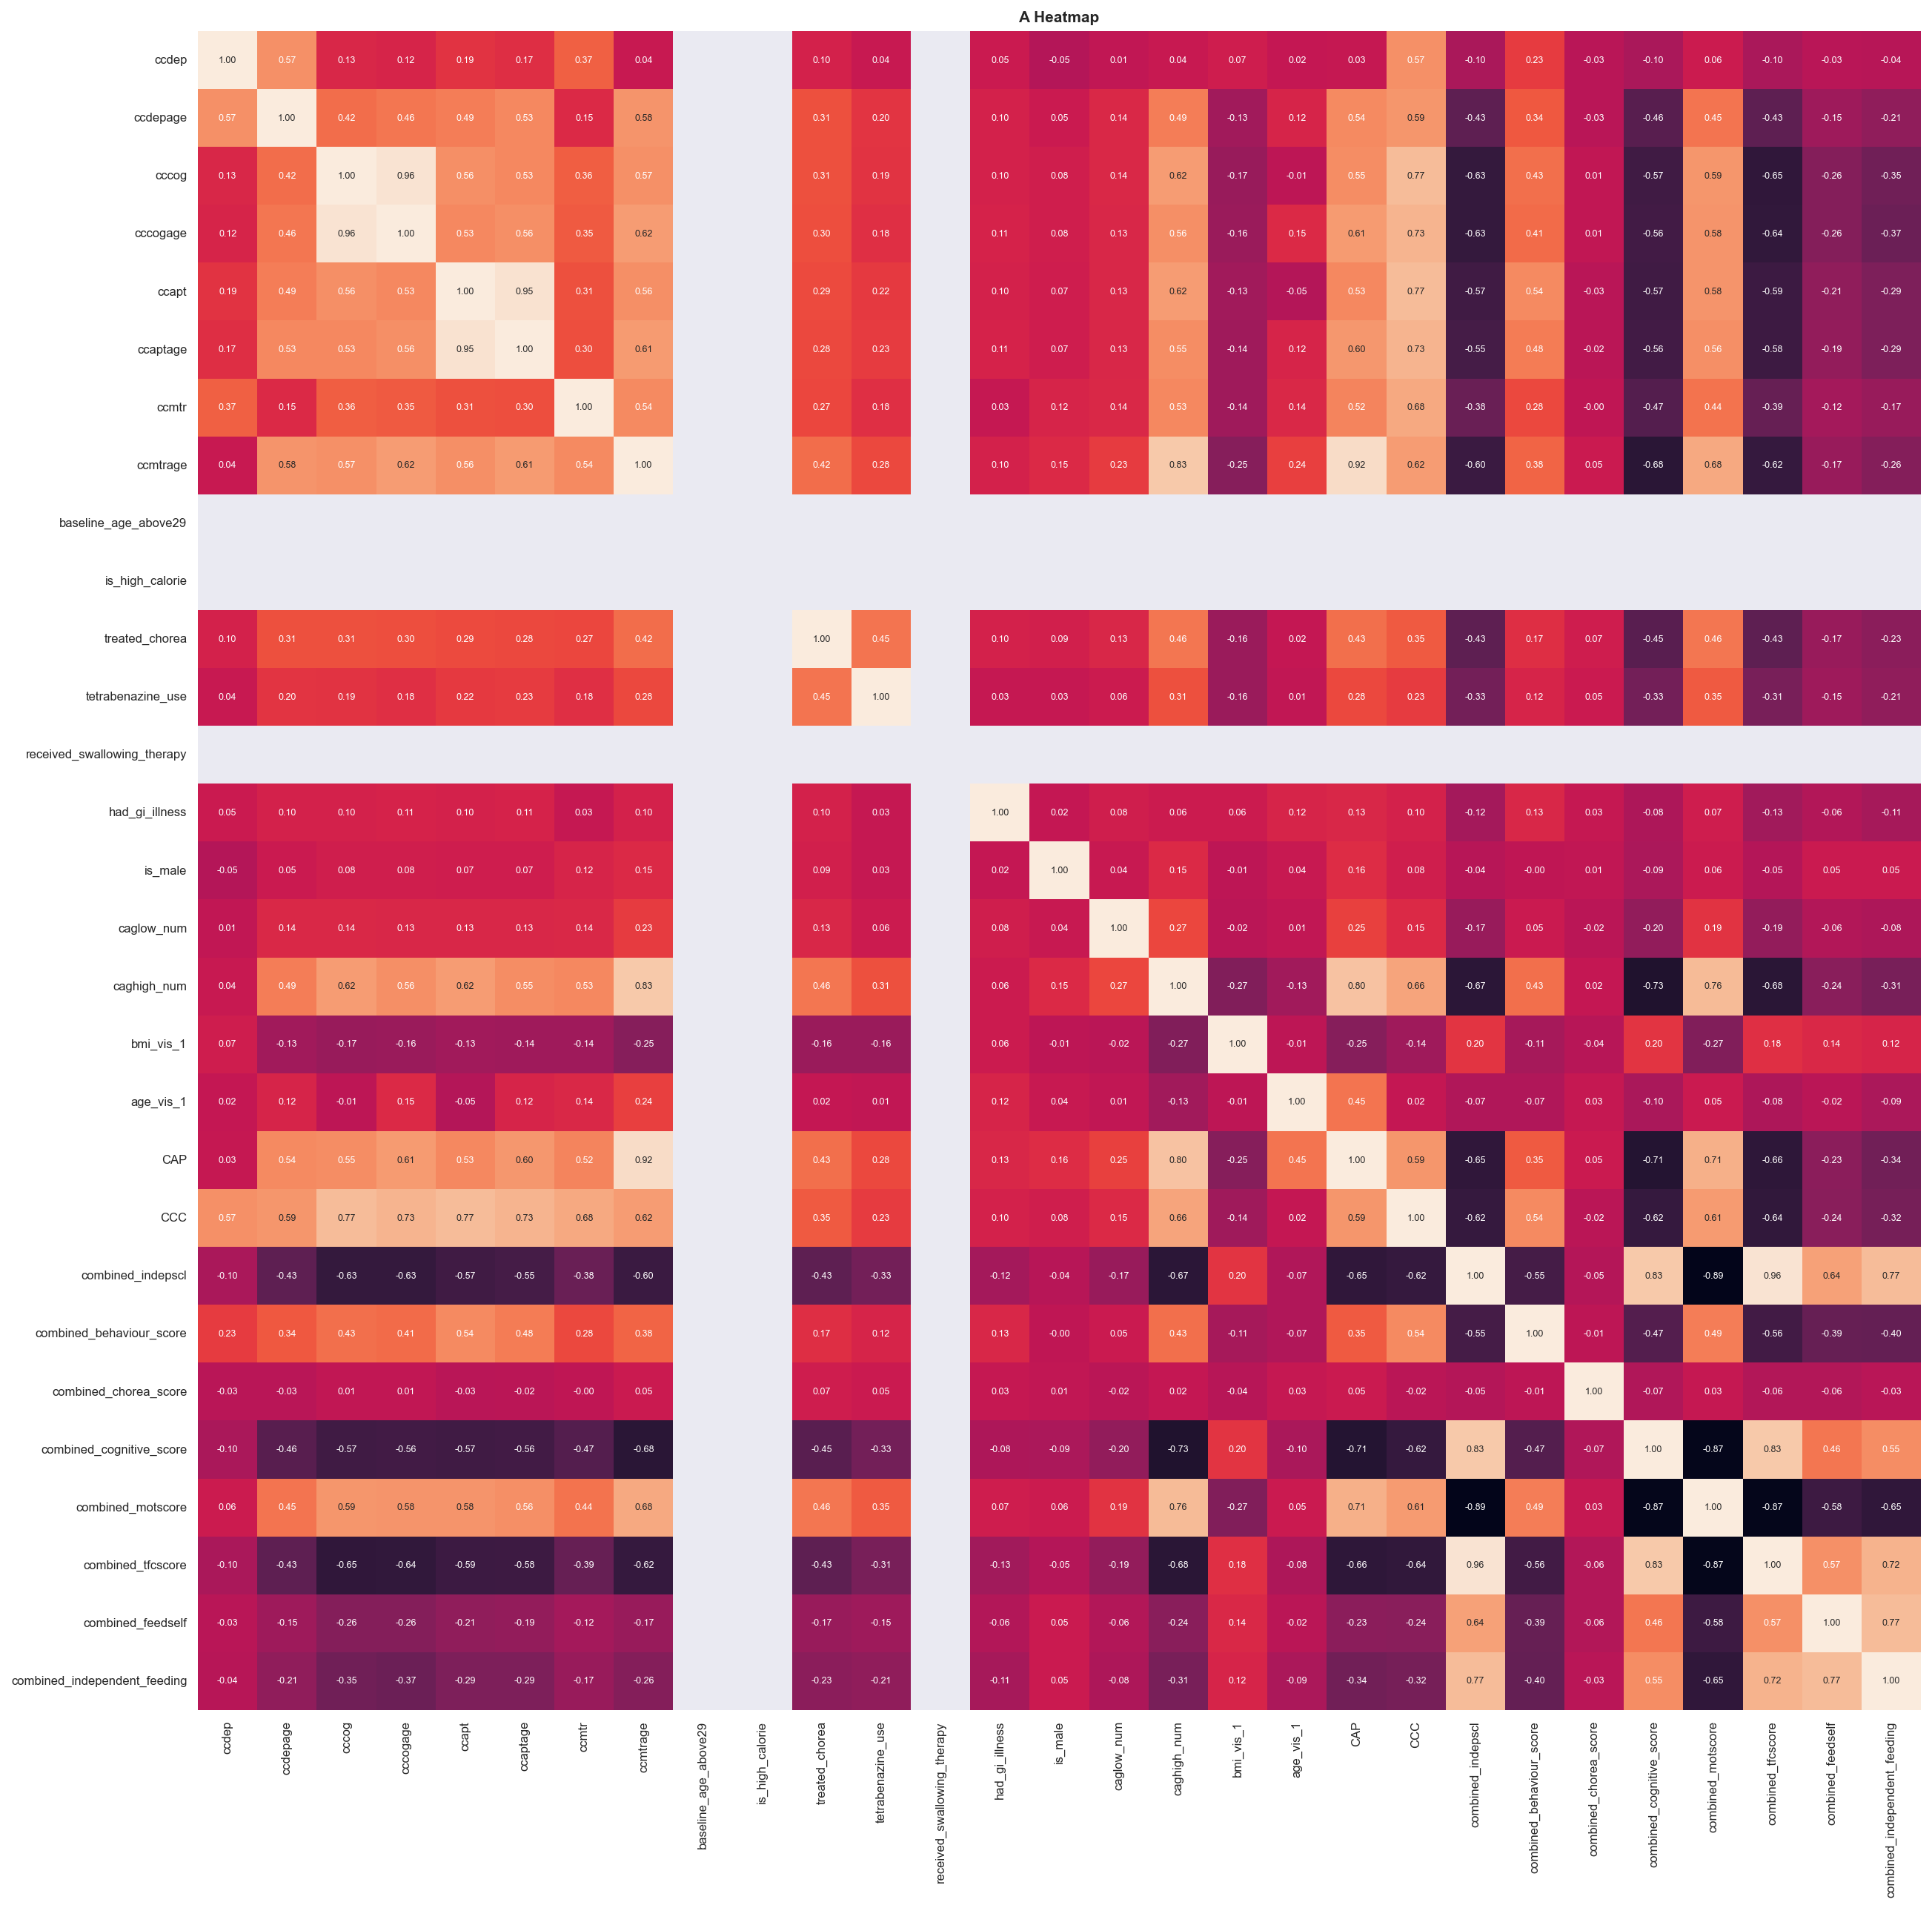

In [26]:
corrn = pd.DataFrame(np.corrcoef(num_enrl, rowvar=False), 
                     columns=num_enrl.columns,
                     index=num_enrl.columns).round(2)
proj.plot_correl_heatmap(corrn, run_correlation=False, figsize=(20, 20), 
                         show_cbar=False, xy_ticklabe_size=8)

#### Drop CC measures

In [27]:
drop_cols = ['ccmtr', 'cccog', 'ccdep', 'ccapt']
num_enrl = num_enrl.drop(drop_cols, axis=1)

<AxesSubplot:title={'center':'A Heatmap'}>

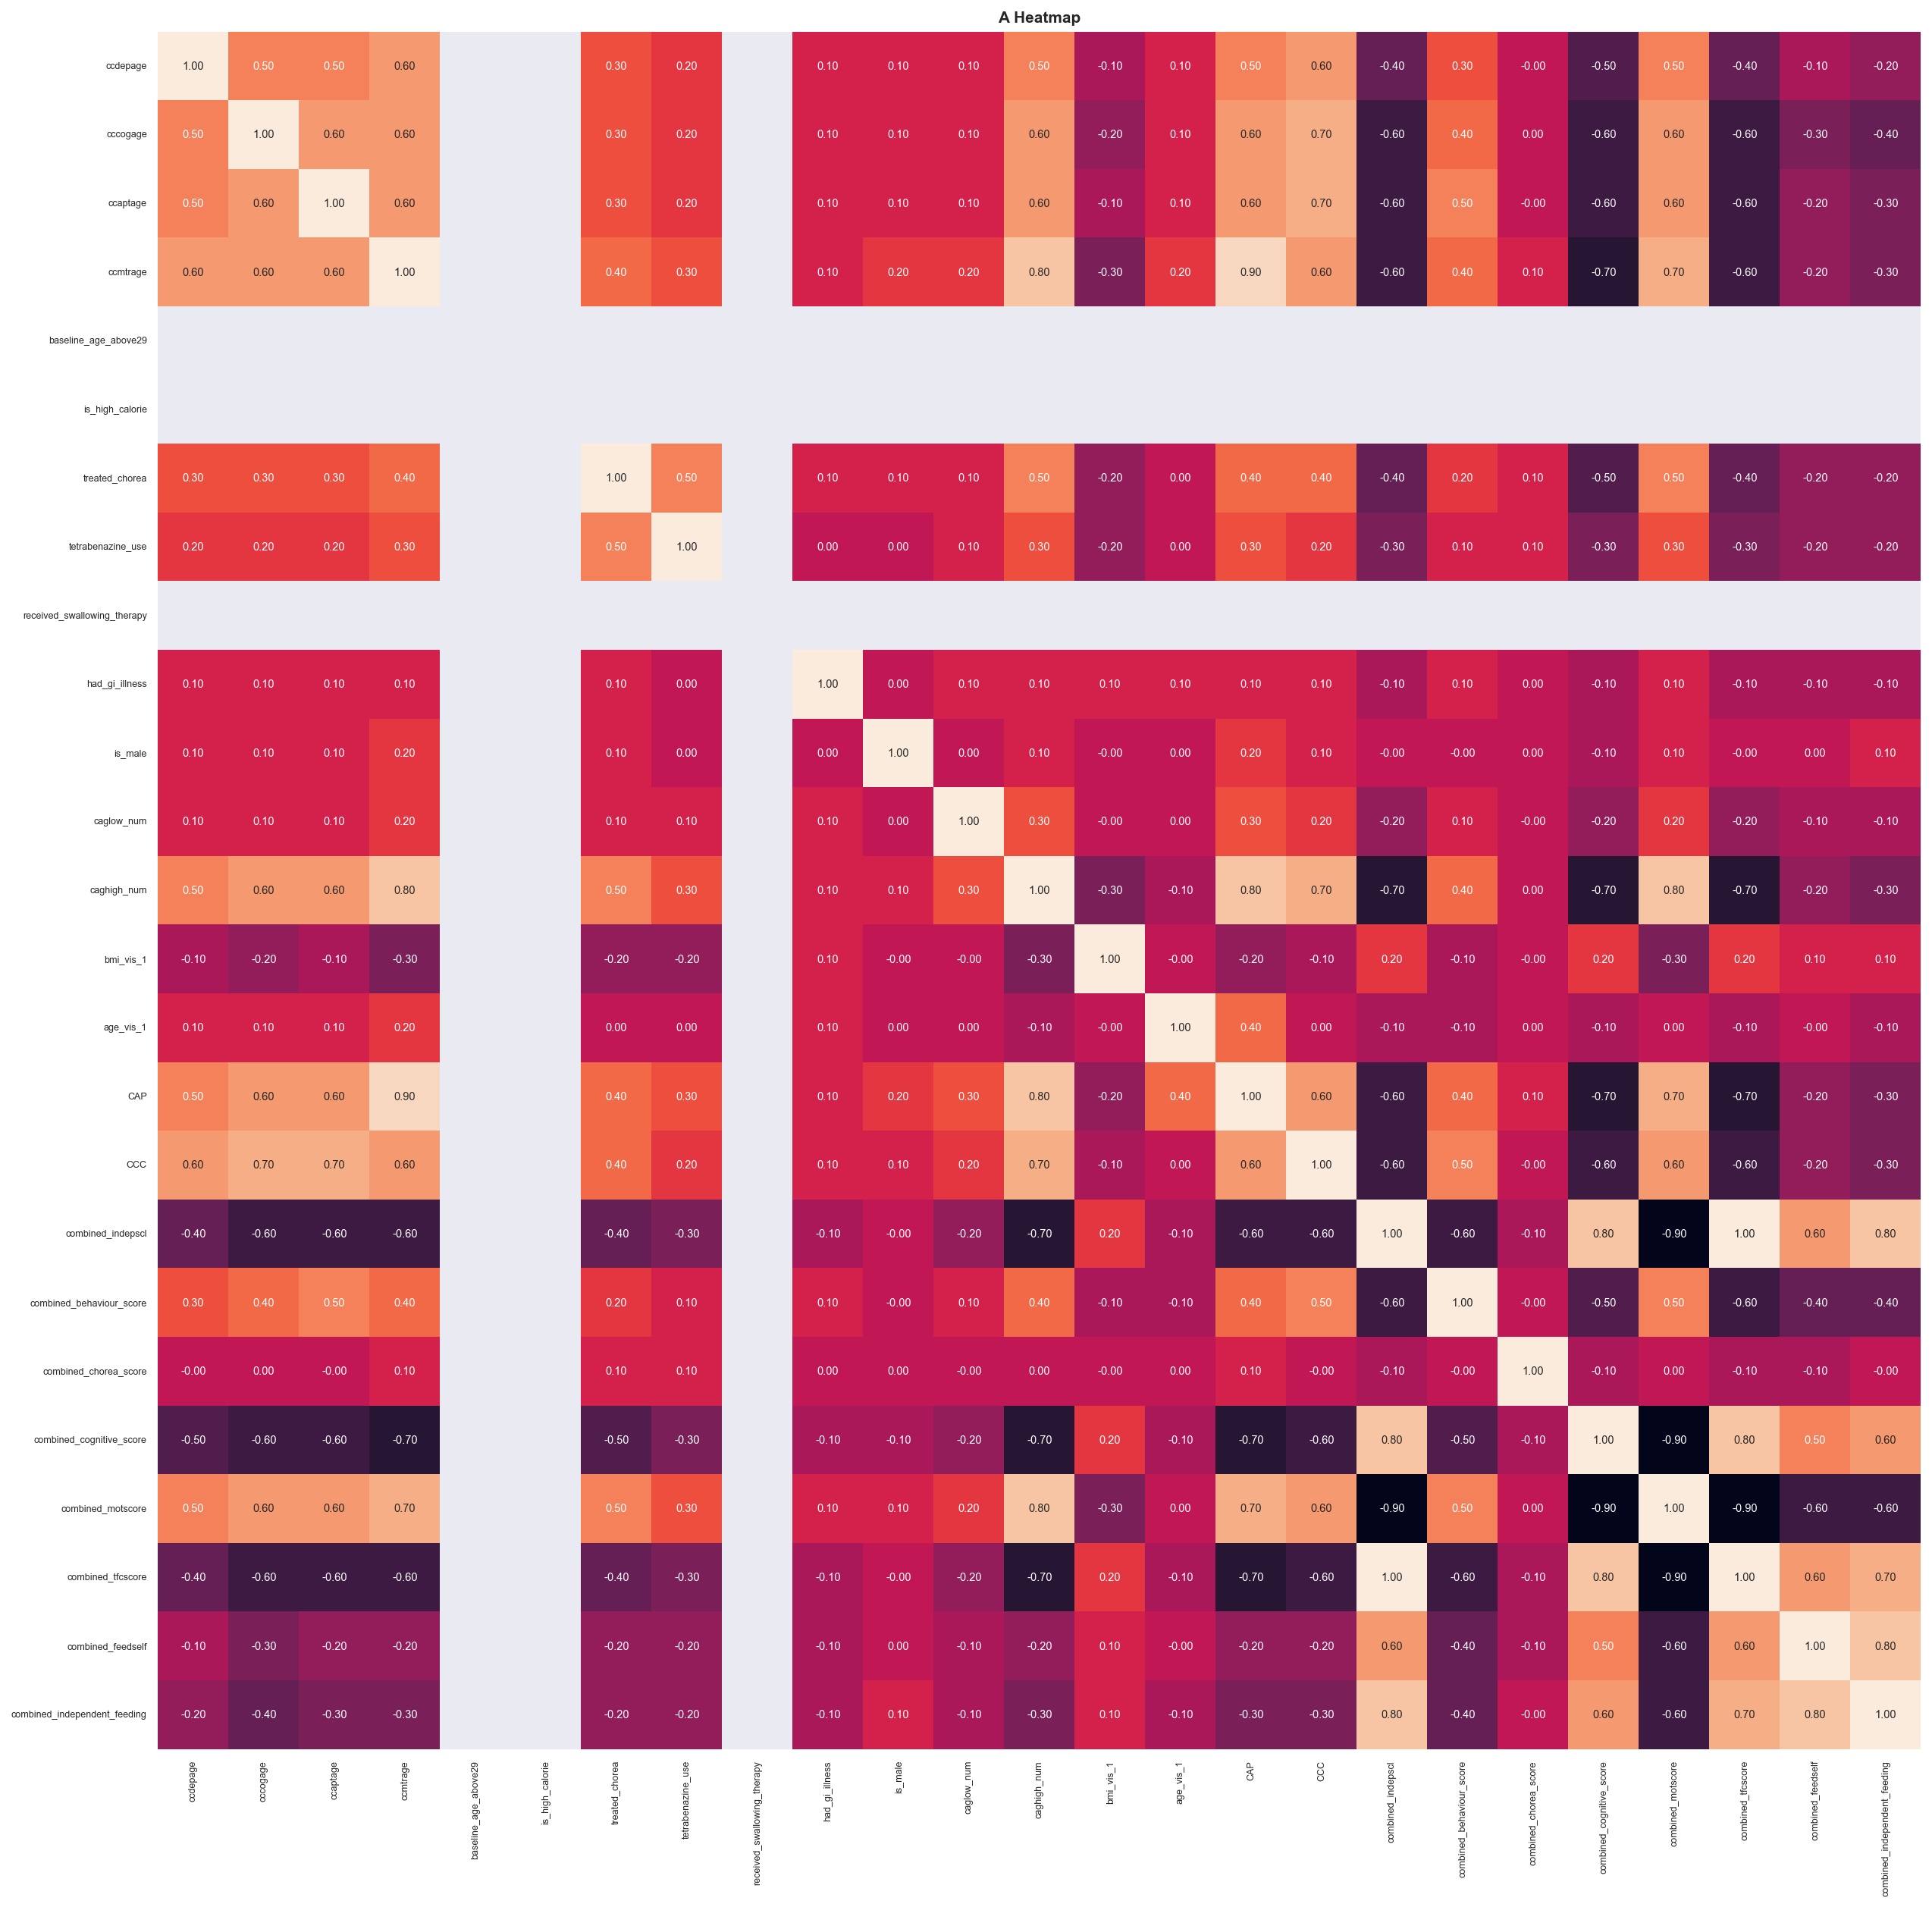

In [28]:
corrn = num_enrl.corr().round(1)
proj.plot_correl_heatmap(corrn, run_correlation=False, annot_size=7, xy_labe_size=15, figsize=(20, 20), show_cbar=False)

#### Drop some autocorrelated variables

In [29]:
drop_cols = proj.get_columns_with_pattern(num_enrl, 
                                          ['ccmtrage', 'caghigh', 'motscore', 'independent']).columns

display(drop_cols)
num_enrl = num_enrl.drop(drop_cols, axis=1)
display(num_enrl)

Index(['ccmtrage', 'caghigh_num', 'combined_motscore',
       'combined_independent_feeding'],
      dtype='object')

,ccdepage,cccogage,ccaptage,baseline_age_above29,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,bmi_vis_1,age_vis_1,CAP,CCC,combined_indepscl,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_tfcscore,combined_feedself
0,0.0,0.0,0.0,1,0,0,0,0,1,1,16,31.3,65,1235.0,2,500.0,0.0,0.0,1049.0,65.0,5.0
1,54.0,0.0,0.0,1,0,0,0,0,0,0,15,30.4,60,1320.0,1,500.0,10.8,0.0,1204.2,65.0,5.0
2,49.0,0.0,0.0,1,0,1,0,0,1,1,26,23.0,55,2255.0,2,455.0,56.0,60.0,971.0,47.0,5.0
3,49.0,0.0,40.0,1,0,1,0,0,0,1,15,29.0,46,1978.0,3,480.0,26.0,39.0,1204.0,63.0,5.0
4,0.0,0.0,0.0,1,0,0,0,0,1,0,19,22.7,58,1624.0,2,500.0,41.0,3.0,1056.0,65.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,29.0,0.0,0.0,1,0,0,1,0,1,0,15,18.8,30,1380.0,2,490.0,71.0,34.0,1011.0,61.0,5.0
862,0.0,0.0,15.0,1,0,1,0,0,0,1,20,23.7,59,2537.0,2,437.5,0.0,75.0,890.0,55.0,5.0
863,62.0,0.0,68.0,1,0,0,0,0,0,0,18,19.5,69,2829.0,3,370.0,141.0,68.0,568.0,40.0,5.0
864,0.0,0.0,0.0,1,0,0,0,0,1,1,17,38.9,50,900.0,0,500.0,4.0,0.0,1448.0,65.0,5.0


#### Drop some meaningless (zero variance) variables

In [30]:
drop_cols = ['is_high_calorie', 'received_swallowing_therapy', 'baseline_age_above29'] + [c for c in list(proj.get_columns_with_pattern(num_enrl, 
                                                                                                                                        ['indepscl', 'fascore']).columns) if c.split('_vis_')[0] not in ['bmi', 'bmi_outcome']]
display(drop_cols)
num_enrl = num_enrl.drop(drop_cols, axis=1)
display(num_enrl)

['is_high_calorie',
 'received_swallowing_therapy',
 'baseline_age_above29',
 'combined_indepscl']

,ccdepage,cccogage,ccaptage,treated_chorea,tetrabenazine_use,had_gi_illness,is_male,caglow_num,bmi_vis_1,age_vis_1,CAP,CCC,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_tfcscore,combined_feedself
0,0.0,0.0,0.0,0,0,1,1,16,31.3,65,1235.0,2,0.0,0.0,1049.0,65.0,5.0
1,54.0,0.0,0.0,0,0,0,0,15,30.4,60,1320.0,1,10.8,0.0,1204.2,65.0,5.0
2,49.0,0.0,0.0,1,0,1,1,26,23.0,55,2255.0,2,56.0,60.0,971.0,47.0,5.0
3,49.0,0.0,40.0,1,0,0,1,15,29.0,46,1978.0,3,26.0,39.0,1204.0,63.0,5.0
4,0.0,0.0,0.0,0,0,1,0,19,22.7,58,1624.0,2,41.0,3.0,1056.0,65.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,29.0,0.0,0.0,0,1,1,0,15,18.8,30,1380.0,2,71.0,34.0,1011.0,61.0,5.0
862,0.0,0.0,15.0,1,0,0,1,20,23.7,59,2537.0,2,0.0,75.0,890.0,55.0,5.0
863,62.0,0.0,68.0,0,0,0,0,18,19.5,69,2829.0,3,141.0,68.0,568.0,40.0,5.0
864,0.0,0.0,0.0,0,0,1,1,17,38.9,50,900.0,0,4.0,0.0,1448.0,65.0,5.0


#### Sixth BMI Level 

In [31]:
cols = 'bmi_level_vis_6'
# guide = {'0. underweight':1, '1. normal':2, '2. overweight':3, '3. obese':4, '4. severely obese':5}
y_int = str_vars[cols].str.split('. ').str[0].astype(int)
X = num_enrl
display(drop_cols, X, y_int)

['is_high_calorie',
 'received_swallowing_therapy',
 'baseline_age_above29',
 'combined_indepscl']

,ccdepage,cccogage,ccaptage,treated_chorea,tetrabenazine_use,had_gi_illness,is_male,caglow_num,bmi_vis_1,age_vis_1,CAP,CCC,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_tfcscore,combined_feedself
0,0.0,0.0,0.0,0,0,1,1,16,31.3,65,1235.0,2,0.0,0.0,1049.0,65.0,5.0
1,54.0,0.0,0.0,0,0,0,0,15,30.4,60,1320.0,1,10.8,0.0,1204.2,65.0,5.0
2,49.0,0.0,0.0,1,0,1,1,26,23.0,55,2255.0,2,56.0,60.0,971.0,47.0,5.0
3,49.0,0.0,40.0,1,0,0,1,15,29.0,46,1978.0,3,26.0,39.0,1204.0,63.0,5.0
4,0.0,0.0,0.0,0,0,1,0,19,22.7,58,1624.0,2,41.0,3.0,1056.0,65.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,29.0,0.0,0.0,0,1,1,0,15,18.8,30,1380.0,2,71.0,34.0,1011.0,61.0,5.0
862,0.0,0.0,15.0,1,0,0,1,20,23.7,59,2537.0,2,0.0,75.0,890.0,55.0,5.0
863,62.0,0.0,68.0,0,0,0,0,18,19.5,69,2829.0,3,141.0,68.0,568.0,40.0,5.0
864,0.0,0.0,0.0,0,0,1,1,17,38.9,50,900.0,0,4.0,0.0,1448.0,65.0,5.0


0      3
1      2
2      1
3      2
4      1
      ..
861    1
862    1
863    1
864    3
865    1
Name: bmi_level_vis_6, Length: 866, dtype: int32

In [32]:
result = proj.get_correlcoeff_with_pvalues(X, y_int, 0.05)
display(result)

,r,pval
bmi_vis_1,0.81,7.64e-200
CAP,-0.30,1.18e-19
combined_cognitive_score,0.23,4.81e-12
combined_tfcscore,0.23,8.60e-12
tetrabenazine_use,-0.17,1.00e-06
treated_chorea,-0.16,1.36e-06
cccogage,-0.16,1.41e-06
combined_feedself,0.15,5.40e-06
ccaptage,-0.15,6.34e-06
CCC,-0.15,1.72e-05


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Correlation Between BMI Classes and Variables'}, ylabel='Correlation Coefficient'>

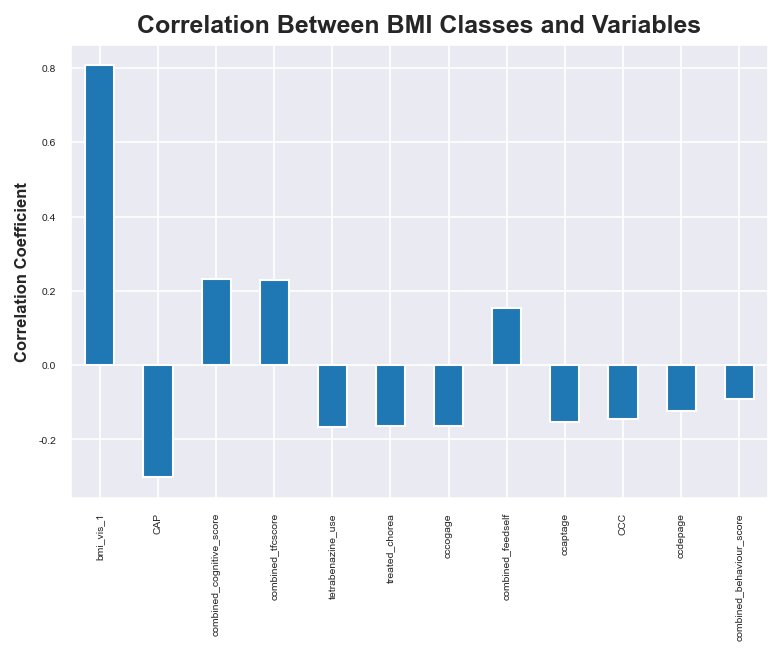

In [33]:
fig, ax1 = plt.subplots(figsize=[6, 4], dpi=150)
result['r'].plot(kind='bar', ax=ax1)
proj.adjust_axis(ax1, plot_title='Correlation Between BMI Classes and Variables',
                 y_labe="Correlation Coefficient", rotate_xticklabe=90)

### BMI Class Pearson's Correlation (and pvalues)  with UHDRS

In [34]:
combo = proj.get_columns_with_pattern(analyze_df, 'combine')
display(combo)
sc_combo = pd.DataFrame(s_prep.MinMaxScaler().fit_transform(combo),
                        columns=combo.columns)
display(sc_combo)
y_dum = pd.get_dummies(analyze_df['bmi_level_vis_6'])
display(y_dum)

result = proj.get_correlcoeff_with_pvalues(sc_combo, y_dum, 0.05)
for cat in result:
    print(cat)
    display(result[cat])
    print()

,combined_indepscl,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_fascore,combined_motscore,combined_tfcscore,combined_feedself,combined_height,combined_independent_feeding,combined_visdy,combined_weight
0,500.0,0.0,0.0,1049.0,125.0,0.0,65.0,5.0,885.8,5.0,3718.0,497.0
1,500.0,10.8,0.0,1204.2,125.0,0.0,65.0,5.0,825.5,5.0,3961.8,437.2
2,455.0,56.0,60.0,971.0,110.0,105.0,47.0,5.0,882.0,5.0,4018.0,361.5
3,480.0,26.0,39.0,1204.0,123.0,95.0,63.0,5.0,935.1,5.0,4042.0,473.4
4,500.0,41.0,3.0,1056.0,125.0,3.0,65.0,5.0,785.0,5.0,3633.0,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...
861,490.0,71.0,34.0,1011.0,122.0,85.0,61.0,5.0,855.0,5.0,3628.0,275.0
862,437.5,0.0,75.0,890.0,117.5,255.0,55.0,5.0,870.0,5.0,912.5,354.0
863,370.0,141.0,68.0,568.0,84.0,254.0,40.0,5.0,805.0,5.0,3486.0,270.3
864,500.0,4.0,0.0,1448.0,125.0,22.0,65.0,5.0,902.5,5.0,3820.0,640.8


,combined_indepscl,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_fascore,combined_motscore,combined_tfcscore,combined_feedself,combined_height,combined_independent_feeding,combined_visdy,combined_weight
0,1.00,0.00,0.00e+00,0.61,1.00,0.00e+00,1.00,1.0,0.68,1.0,6.84e-01,0.52
1,1.00,0.04,0.00e+00,0.70,1.00,0.00e+00,1.00,1.0,0.48,1.0,7.43e-01,0.42
2,0.89,0.18,7.14e-04,0.56,0.88,1.87e-01,0.72,1.0,0.67,1.0,7.57e-01,0.29
3,0.95,0.09,4.64e-04,0.70,0.98,1.69e-01,0.97,1.0,0.84,1.0,7.63e-01,0.48
4,1.00,0.13,3.57e-05,0.61,1.00,5.34e-03,1.00,1.0,0.35,1.0,6.64e-01,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...
861,0.98,0.23,4.05e-04,0.59,0.98,1.51e-01,0.94,1.0,0.58,1.0,6.62e-01,0.14
862,0.85,0.00,8.93e-04,0.52,0.94,4.54e-01,0.85,1.0,0.63,1.0,4.84e-03,0.28
863,0.69,0.46,8.09e-04,0.33,0.67,4.52e-01,0.62,1.0,0.42,1.0,6.28e-01,0.13
864,1.00,0.01,0.00e+00,0.84,1.00,3.91e-02,1.00,1.0,0.73,1.0,7.09e-01,0.76


,0. underweight,1. normal,2. overweight,3. obese,4. severely obese
0,0,0,0,1,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
861,0,1,0,0,0
862,0,1,0,0,0
863,0,1,0,0,0
864,0,0,0,1,0


0. underweight


,r,pval
combined_weight,-0.26,6.78e-15
combined_motscore,0.18,9.59e-08
combined_indepscl,-0.16,4.51e-06
combined_cognitive_score,-0.15,1.52e-05
combined_tfcscore,-0.13,1.01e-04
combined_fascore,-0.11,1.87e-03
combined_feedself,-0.11,1.95e-03
combined_independent_feeding,-0.10,2.47e-03
combined_behaviour_score,0.07,3.00e-02



1. normal


,r,pval
combined_weight,-0.50,4.37e-55
combined_motscore,0.18,7.72e-08
combined_indepscl,-0.14,3.01e-05
combined_cognitive_score,-0.14,6.53e-05
combined_tfcscore,-0.13,9.89e-05
combined_fascore,-0.13,1.44e-04
combined_feedself,-0.10,5.01e-03
combined_independent_feeding,-0.08,1.35e-02



2. overweight


,r,pval
combined_height,0.08,0.03



3. obese


,r,pval
combined_weight,0.46,5.33e-47
combined_motscore,-0.18,6.28e-08
combined_indepscl,0.15,6.13e-06
combined_tfcscore,0.13,1.28e-04
combined_cognitive_score,0.13,1.62e-04
combined_fascore,0.13,1.74e-04
combined_independent_feeding,0.09,6.67e-03
combined_feedself,0.09,6.94e-03
combined_height,-0.08,1.89e-02



4. severely obese


,r,pval
combined_weight,0.45,1.09e-43
combined_motscore,-0.15,1.11e-05
combined_indepscl,0.13,2.24e-04
combined_tfcscore,0.12,2.66e-04
combined_cognitive_score,0.11,7.69e-04
combined_fascore,0.11,1.64e-03
combined_height,-0.09,8.88e-03


### BMI Class Pearson's Correlation (and pvalues)  with variables

In [35]:
y_dum

,0. underweight,1. normal,2. overweight,3. obese,4. severely obese
0,0,0,0,1,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
861,0,1,0,0,0
862,0,1,0,0,0
863,0,1,0,0,0
864,0,0,0,1,0


In [36]:
sc_df = pd.DataFrame(s_prep.MinMaxScaler().fit_transform(num_enrl),
                        columns=num_enrl.columns)
display(sc_df)
y_dum = pd.get_dummies(analyze_df['bmi_level_vis_6'])
display(y_dum)

result = proj.get_correlcoeff_with_pvalues(sc_df, y_dum, 0.05)
for cat in result:
    print(cat)
    display(result[cat])
    print()

,ccdepage,cccogage,ccaptage,treated_chorea,tetrabenazine_use,had_gi_illness,is_male,caglow_num,bmi_vis_1,age_vis_1,CAP,CCC,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_tfcscore,combined_feedself
0,0.00,0.0,0.00,0.0,0.0,1.0,1.0,0.35,0.38,0.66,0.27,0.50,0.00,0.00e+00,0.61,1.00,1.0
1,0.67,0.0,0.00,0.0,0.0,0.0,0.0,0.30,0.35,0.57,0.30,0.25,0.04,0.00e+00,0.70,1.00,1.0
2,0.60,0.0,0.00,1.0,0.0,1.0,1.0,0.85,0.17,0.47,0.63,0.50,0.18,7.14e-04,0.56,0.72,1.0
3,0.60,0.0,0.48,1.0,0.0,0.0,1.0,0.30,0.32,0.30,0.53,0.75,0.09,4.64e-04,0.70,0.97,1.0
4,0.00,0.0,0.00,0.0,0.0,1.0,0.0,0.50,0.17,0.53,0.41,0.50,0.13,3.57e-05,0.61,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,0.36,0.0,0.00,0.0,1.0,1.0,0.0,0.30,0.07,0.00,0.32,0.50,0.23,4.05e-04,0.59,0.94,1.0
862,0.00,0.0,0.18,1.0,0.0,0.0,1.0,0.55,0.19,0.55,0.73,0.50,0.00,8.93e-04,0.52,0.85,1.0
863,0.77,0.0,0.82,0.0,0.0,0.0,0.0,0.45,0.09,0.74,0.84,0.75,0.46,8.09e-04,0.33,0.62,1.0
864,0.00,0.0,0.00,0.0,0.0,1.0,1.0,0.40,0.56,0.38,0.15,0.00,0.01,0.00e+00,0.84,1.00,1.0


,0. underweight,1. normal,2. overweight,3. obese,4. severely obese
0,0,0,0,1,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
861,0,1,0,0,0
862,0,1,0,0,0
863,0,1,0,0,0
864,0,0,0,1,0


0. underweight


,r,pval
bmi_vis_1,-0.23,6.44e-12
combined_cognitive_score,-0.15,1.52e-05
combined_tfcscore,-0.13,1.01e-04
combined_feedself,-0.11,1.95e-03
tetrabenazine_use,0.09,8.75e-03
CAP,0.09,9.42e-03
treated_chorea,0.08,1.89e-02
ccaptage,0.08,2.16e-02
combined_behaviour_score,0.07,3.00e-02
cccogage,0.07,4.65e-02



1. normal


,r,pval
bmi_vis_1,-0.53,3.64e-63
CAP,0.21,2.87e-10
combined_cognitive_score,-0.14,6.53e-05
combined_tfcscore,-0.13,9.89e-05
tetrabenazine_use,0.10,4.12e-03
combined_feedself,-0.10,5.01e-03
treated_chorea,0.09,7.41e-03
cccogage,0.07,2.82e-02



2. overweight


,r,pval
is_male,0.13,1.37e-04
ccdepage,0.08,2.01e-02
age_vis_1,0.07,3.48e-02



3. obese


,r,pval
bmi_vis_1,0.52,2.02e-60
CAP,-0.19,7.88e-09
combined_tfcscore,0.13,1.28e-04
combined_cognitive_score,0.13,1.62e-04
ccdepage,-0.11,7.11e-04
tetrabenazine_use,-0.11,7.87e-04
ccaptage,-0.11,9.34e-04
cccogage,-0.10,4.13e-03
combined_feedself,0.09,6.94e-03
treated_chorea,-0.09,7.11e-03



4. severely obese


,r,pval
bmi_vis_1,0.52,6.59e-61
CAP,-0.17,3.09e-07
cccogage,-0.13,1.24e-04
CCC,-0.13,1.62e-04
combined_tfcscore,0.12,2.66e-04
combined_cognitive_score,0.11,7.69e-04
is_male,-0.11,9.29e-04
ccaptage,-0.11,1.39e-03
treated_chorea,-0.11,1.82e-03
ccdepage,-0.09,5.62e-03


#### Pearson Correlation Coefficient

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'A Column Chart'}>

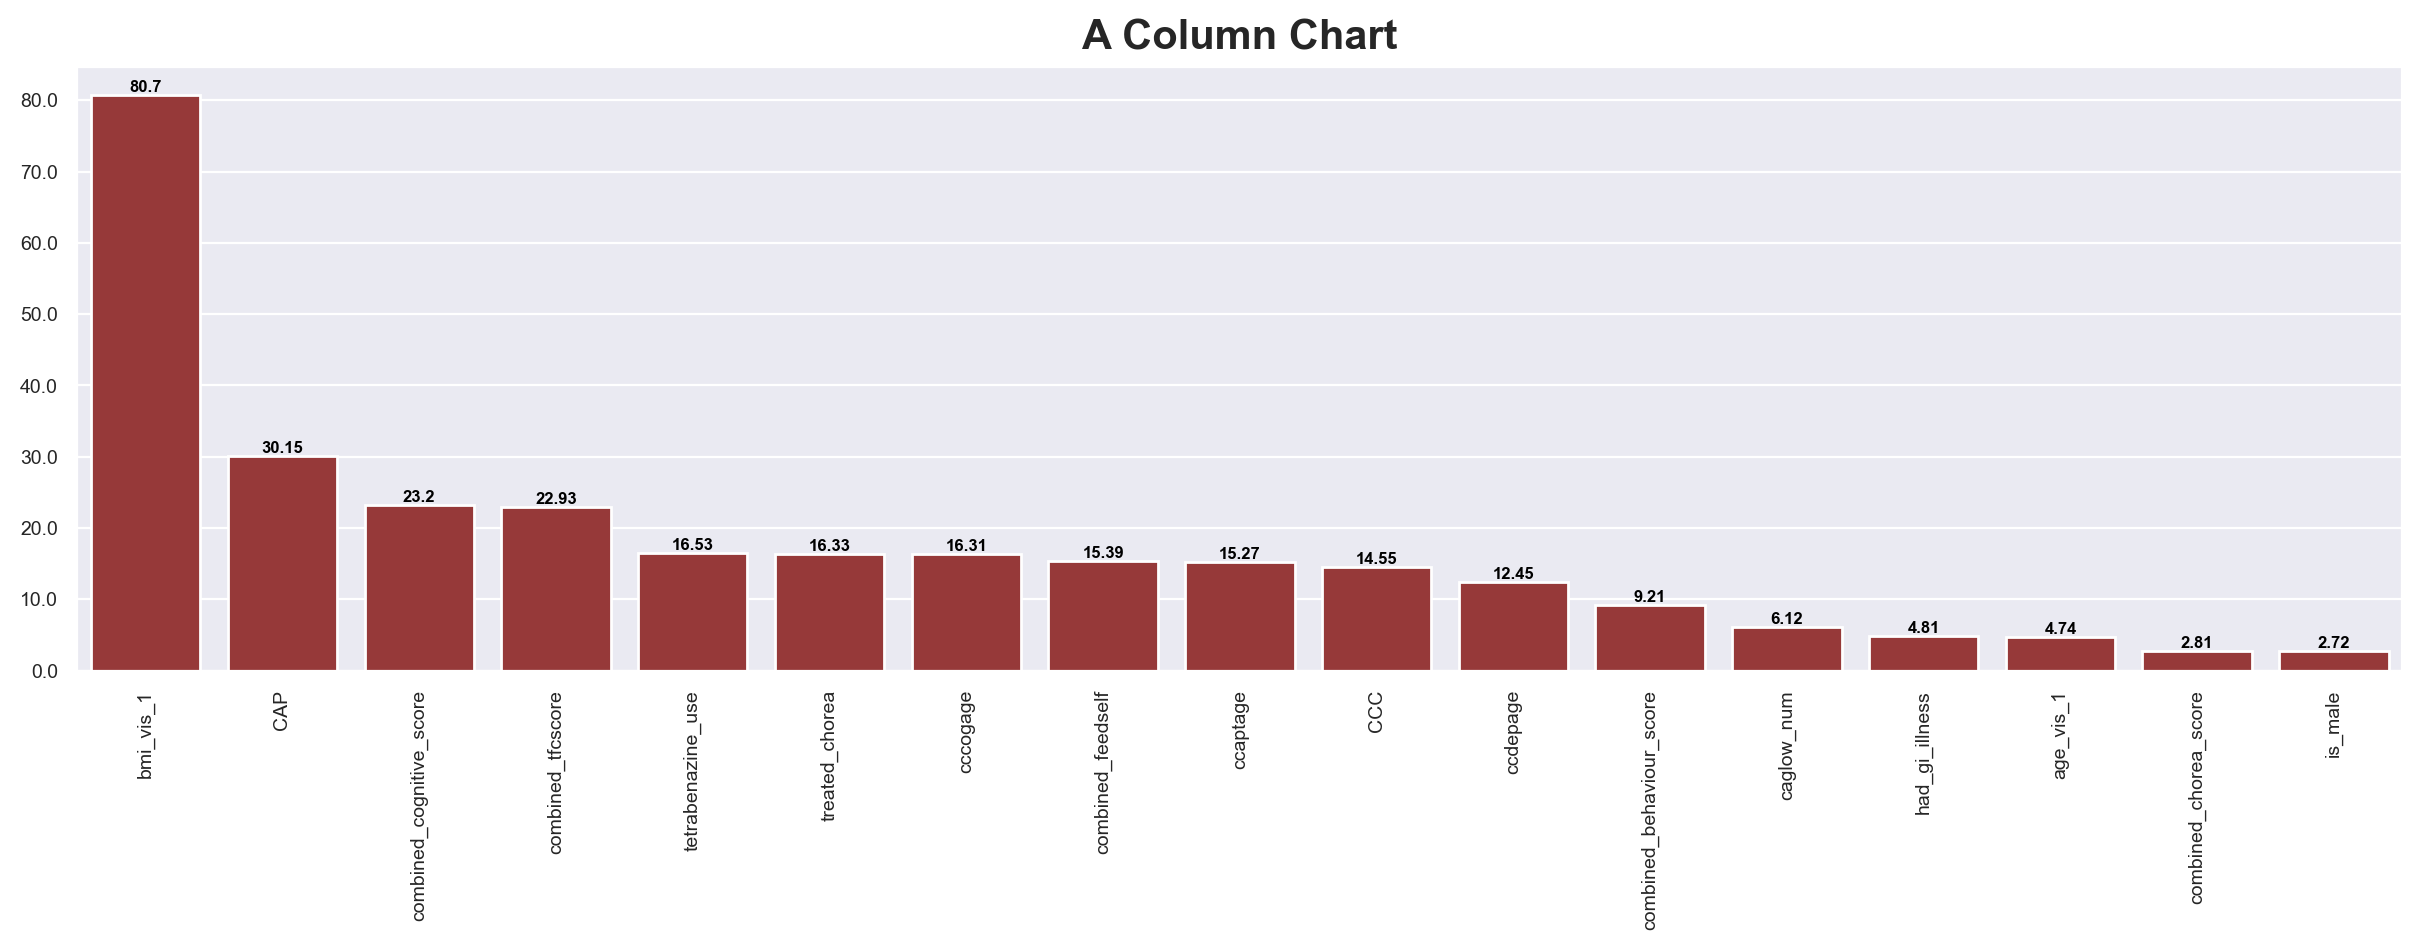

In [37]:
corrn = proj.corr_with_pearson(X, y_int)
proj.plot_column(corrn.index, corrn, color='brown', bot_labe_color='black', figsize=(15, 4), rotate_xticklabe=90)

In [38]:
y_cat = str_vars['bmi_level_vis_6']

display(y_cat,
        y_cat.value_counts().sort_index())

0           3. obese
1      2. overweight
2          1. normal
3      2. overweight
4          1. normal
           ...      
861        1. normal
862        1. normal
863        1. normal
864         3. obese
865        1. normal
Name: bmi_level_vis_6, Length: 866, dtype: object

0. underweight        34
1. normal            352
2. overweight        256
3. obese             185
4. severely obese     39
Name: bmi_level_vis_6, dtype: int64

In [39]:
# y_dummies = pd.get_dummies(y_cat)
# y_dummies

### Data Split

In [40]:
# 70% train, 20% val, 10% test
display(X)
(x_train, x_test, y_train, y_test) = s_ms.train_test_split(X.values, y_int.values, test_size=0.34, 
                                                           stratify=y_int, random_state=101)

print(f"Training: {len(x_train)} samples\nTest: {len(x_test)}")
display(x_train.shape, y_test.shape)
display(pd.Series(y_train).value_counts(),
        pd.Series(y_test).value_counts())

,ccdepage,cccogage,ccaptage,treated_chorea,tetrabenazine_use,had_gi_illness,is_male,caglow_num,bmi_vis_1,age_vis_1,CAP,CCC,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_tfcscore,combined_feedself
0,0.0,0.0,0.0,0,0,1,1,16,31.3,65,1235.0,2,0.0,0.0,1049.0,65.0,5.0
1,54.0,0.0,0.0,0,0,0,0,15,30.4,60,1320.0,1,10.8,0.0,1204.2,65.0,5.0
2,49.0,0.0,0.0,1,0,1,1,26,23.0,55,2255.0,2,56.0,60.0,971.0,47.0,5.0
3,49.0,0.0,40.0,1,0,0,1,15,29.0,46,1978.0,3,26.0,39.0,1204.0,63.0,5.0
4,0.0,0.0,0.0,0,0,1,0,19,22.7,58,1624.0,2,41.0,3.0,1056.0,65.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,29.0,0.0,0.0,0,1,1,0,15,18.8,30,1380.0,2,71.0,34.0,1011.0,61.0,5.0
862,0.0,0.0,15.0,1,0,0,1,20,23.7,59,2537.0,2,0.0,75.0,890.0,55.0,5.0
863,62.0,0.0,68.0,0,0,0,0,18,19.5,69,2829.0,3,141.0,68.0,568.0,40.0,5.0
864,0.0,0.0,0.0,0,0,1,1,17,38.9,50,900.0,0,4.0,0.0,1448.0,65.0,5.0


Training: 571 samples
Test: 295


(571, 17)

(295,)

1    232
2    169
3    122
4     26
0     22
dtype: int64

1    120
2     87
3     63
4     13
0     12
dtype: int64

### Upsample unbalanced training set labels

In [41]:
# using SMOTE
smote = SMOTE(random_state=101)
x_train, y_train = smote.fit_resample(x_train, y_train)
display(pd.Series(y_train).value_counts())

1    232
2    232
3    232
0    232
4    232
dtype: int64

### Rescale predictor variables

In [42]:
scaler = s_prep.MinMaxScaler().fit(x_train)
sc_xtrain, sc_xtest = scaler.transform(x_train), scaler.transform(x_test)
sc_xtrain, sc_xtest = pd.DataFrame(sc_xtrain, columns=X.columns), pd.DataFrame(sc_xtest, columns=X.columns)
y_train, y_test = pd.Series(y_train, name='bmi_level_vis_6'), pd.Series(y_test, name='bmi_level_vis_6')
display(sc_xtrain, sc_xtest, y_train, y_test)

,ccdepage,cccogage,ccaptage,treated_chorea,tetrabenazine_use,had_gi_illness,is_male,caglow_num,bmi_vis_1,age_vis_1,CAP,CCC,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_tfcscore,combined_feedself
0,0.60,0.65,0.00,0.0,0.0,0.0,0.00,0.30,0.10,0.34,0.54,0.75,0.26,1.43e-04,0.56,0.85,1.0
1,0.70,0.77,0.75,0.0,0.0,1.0,1.00,0.90,0.27,0.60,0.73,1.00,0.01,6.78e-04,0.44,0.58,1.0
2,0.23,0.49,0.00,1.0,1.0,0.0,0.00,0.45,0.30,0.23,0.50,0.75,0.28,5.95e-04,0.37,0.65,1.0
3,0.43,0.00,0.37,1.0,0.0,0.0,1.00,0.55,0.13,0.04,0.34,0.75,0.02,1.55e-04,0.41,0.75,1.0
4,0.84,0.85,0.82,1.0,1.0,1.0,1.00,0.45,0.17,0.72,0.80,1.00,0.29,9.16e-04,0.10,0.32,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,0.43,0.00,0.00,0.0,0.0,0.0,0.00,0.40,0.65,0.63,0.29,0.18,0.02,0.00e+00,0.48,1.00,1.0
1156,0.05,0.00,0.00,0.0,0.0,0.1,0.90,0.40,0.62,0.53,0.18,0.50,0.02,3.71e-06,0.76,1.00,1.0
1157,0.00,0.00,0.00,0.0,0.0,0.0,0.64,0.40,0.59,0.48,0.16,0.50,0.11,0.00e+00,0.77,0.99,1.0
1158,0.00,0.00,0.00,0.0,0.0,0.0,0.21,0.40,0.52,0.29,0.11,0.50,0.05,0.00e+00,0.77,1.00,1.0


,ccdepage,cccogage,ccaptage,treated_chorea,tetrabenazine_use,had_gi_illness,is_male,caglow_num,bmi_vis_1,age_vis_1,CAP,CCC,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_tfcscore,combined_feedself
0,0.73,0.82,0.71,1.0,0.0,0.0,1.0,0.55,0.26,0.68,0.84,1.00,0.47,1.08e-03,0.11,0.22,0.0
1,0.84,0.65,0.80,1.0,0.0,0.0,1.0,0.40,0.37,0.66,0.78,1.00,0.52,6.55e-04,0.22,0.20,0.8
2,0.00,0.00,0.00,0.0,0.0,1.0,0.0,0.40,0.20,0.89,0.32,0.50,0.00,0.00e+00,0.66,1.00,1.0
3,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.40,0.32,0.43,0.62,0.25,0.02,2.71e-04,0.58,0.92,1.0
4,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.40,0.12,0.55,0.22,0.50,0.07,0.00e+00,0.71,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,0.00,0.54,0.53,1.0,1.0,1.0,1.0,0.40,0.17,0.25,0.53,0.75,0.90,3.69e-04,0.13,0.17,0.0
291,0.55,0.45,0.53,1.0,0.0,1.0,1.0,0.45,0.23,0.26,0.53,1.00,0.27,6.43e-04,0.33,0.58,1.0
292,0.57,0.53,0.00,1.0,0.0,0.0,1.0,0.40,0.30,0.26,0.51,0.75,0.11,3.33e-04,0.52,0.89,1.0
293,0.00,0.00,0.71,1.0,1.0,0.0,0.0,0.50,0.18,0.42,0.62,0.50,0.08,5.47e-04,0.59,0.94,1.0


0       1
1       2
2       1
3       1
4       1
       ..
1155    4
1156    4
1157    4
1158    4
1159    4
Name: bmi_level_vis_6, Length: 1160, dtype: int32

0      2
1      2
2      2
3      2
4      1
      ..
290    1
291    2
292    2
293    1
294    1
Name: bmi_level_vis_6, Length: 295, dtype: int32

In [43]:
train_df = pd.merge(sc_xtrain, y_train, left_index=True, right_index=True)
test_df = pd.merge(sc_xtest, y_test, left_index=True, right_index=True)
display(train_df, test_df)

,ccdepage,cccogage,ccaptage,treated_chorea,tetrabenazine_use,had_gi_illness,is_male,caglow_num,bmi_vis_1,age_vis_1,CAP,CCC,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_tfcscore,combined_feedself,bmi_level_vis_6
0,0.60,0.65,0.00,0.0,0.0,0.0,0.00,0.30,0.10,0.34,0.54,0.75,0.26,1.43e-04,0.56,0.85,1.0,1
1,0.70,0.77,0.75,0.0,0.0,1.0,1.00,0.90,0.27,0.60,0.73,1.00,0.01,6.78e-04,0.44,0.58,1.0,2
2,0.23,0.49,0.00,1.0,1.0,0.0,0.00,0.45,0.30,0.23,0.50,0.75,0.28,5.95e-04,0.37,0.65,1.0,1
3,0.43,0.00,0.37,1.0,0.0,0.0,1.00,0.55,0.13,0.04,0.34,0.75,0.02,1.55e-04,0.41,0.75,1.0,1
4,0.84,0.85,0.82,1.0,1.0,1.0,1.00,0.45,0.17,0.72,0.80,1.00,0.29,9.16e-04,0.10,0.32,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,0.43,0.00,0.00,0.0,0.0,0.0,0.00,0.40,0.65,0.63,0.29,0.18,0.02,0.00e+00,0.48,1.00,1.0,4
1156,0.05,0.00,0.00,0.0,0.0,0.1,0.90,0.40,0.62,0.53,0.18,0.50,0.02,3.71e-06,0.76,1.00,1.0,4
1157,0.00,0.00,0.00,0.0,0.0,0.0,0.64,0.40,0.59,0.48,0.16,0.50,0.11,0.00e+00,0.77,0.99,1.0,4
1158,0.00,0.00,0.00,0.0,0.0,0.0,0.21,0.40,0.52,0.29,0.11,0.50,0.05,0.00e+00,0.77,1.00,1.0,4


,ccdepage,cccogage,ccaptage,treated_chorea,tetrabenazine_use,had_gi_illness,is_male,caglow_num,bmi_vis_1,age_vis_1,CAP,CCC,combined_behaviour_score,combined_chorea_score,combined_cognitive_score,combined_tfcscore,combined_feedself,bmi_level_vis_6
0,0.73,0.82,0.71,1.0,0.0,0.0,1.0,0.55,0.26,0.68,0.84,1.00,0.47,1.08e-03,0.11,0.22,0.0,2
1,0.84,0.65,0.80,1.0,0.0,0.0,1.0,0.40,0.37,0.66,0.78,1.00,0.52,6.55e-04,0.22,0.20,0.8,2
2,0.00,0.00,0.00,0.0,0.0,1.0,0.0,0.40,0.20,0.89,0.32,0.50,0.00,0.00e+00,0.66,1.00,1.0,2
3,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.40,0.32,0.43,0.62,0.25,0.02,2.71e-04,0.58,0.92,1.0,2
4,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.40,0.12,0.55,0.22,0.50,0.07,0.00e+00,0.71,1.00,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,0.00,0.54,0.53,1.0,1.0,1.0,1.0,0.40,0.17,0.25,0.53,0.75,0.90,3.69e-04,0.13,0.17,0.0,1
291,0.55,0.45,0.53,1.0,0.0,1.0,1.0,0.45,0.23,0.26,0.53,1.00,0.27,6.43e-04,0.33,0.58,1.0,2
292,0.57,0.53,0.00,1.0,0.0,0.0,1.0,0.40,0.30,0.26,0.51,0.75,0.11,3.33e-04,0.52,0.89,1.0,2
293,0.00,0.00,0.71,1.0,1.0,0.0,0.0,0.50,0.18,0.42,0.62,0.50,0.08,5.47e-04,0.59,0.94,1.0,1


### Multicollinearity

<AxesSubplot:title={'center':'A Heatmap'}>

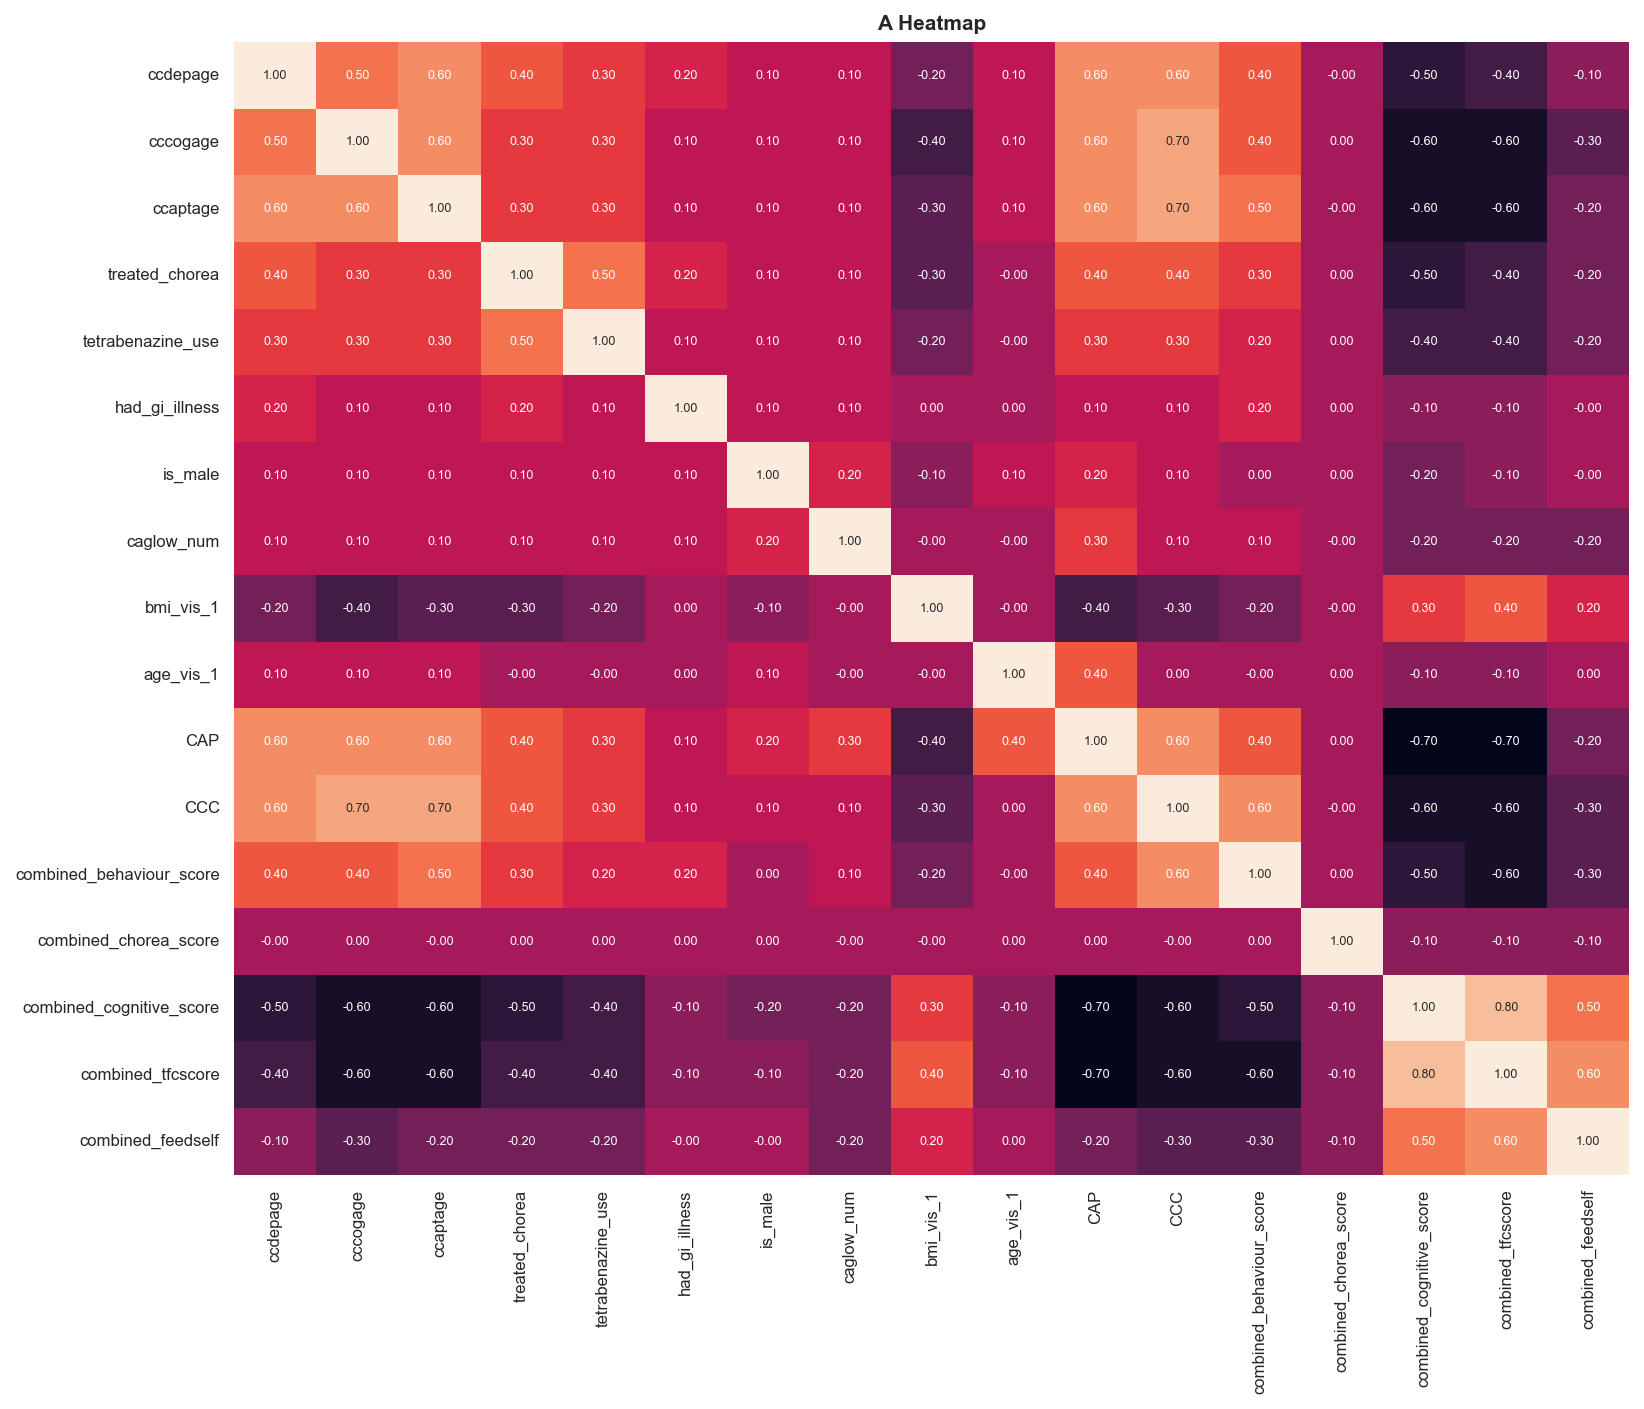

In [44]:
corrn = sc_xtrain.corr().round(1)
proj.plot_correl_heatmap(corrn, run_correlation=False, annot_size=6, figsize=(12, 10), 
                         xy_ticklabe_size=8, show_cbar=False)

bmi_vis_1                   86.79
CAP                         40.71
combined_tfcscore           40.18
combined_cognitive_score    33.63
cccogage                    32.35
ccaptage                    28.41
treated_chorea              25.63
CCC                         22.43
combined_feedself           22.41
combined_behaviour_score    22.07
tetrabenazine_use           20.00
ccdepage                    16.22
is_male                     11.58
caglow_num                  11.36
combined_chorea_score        1.41
had_gi_illness               1.09
age_vis_1                    0.67
dtype: float64

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'A Column Chart'}>

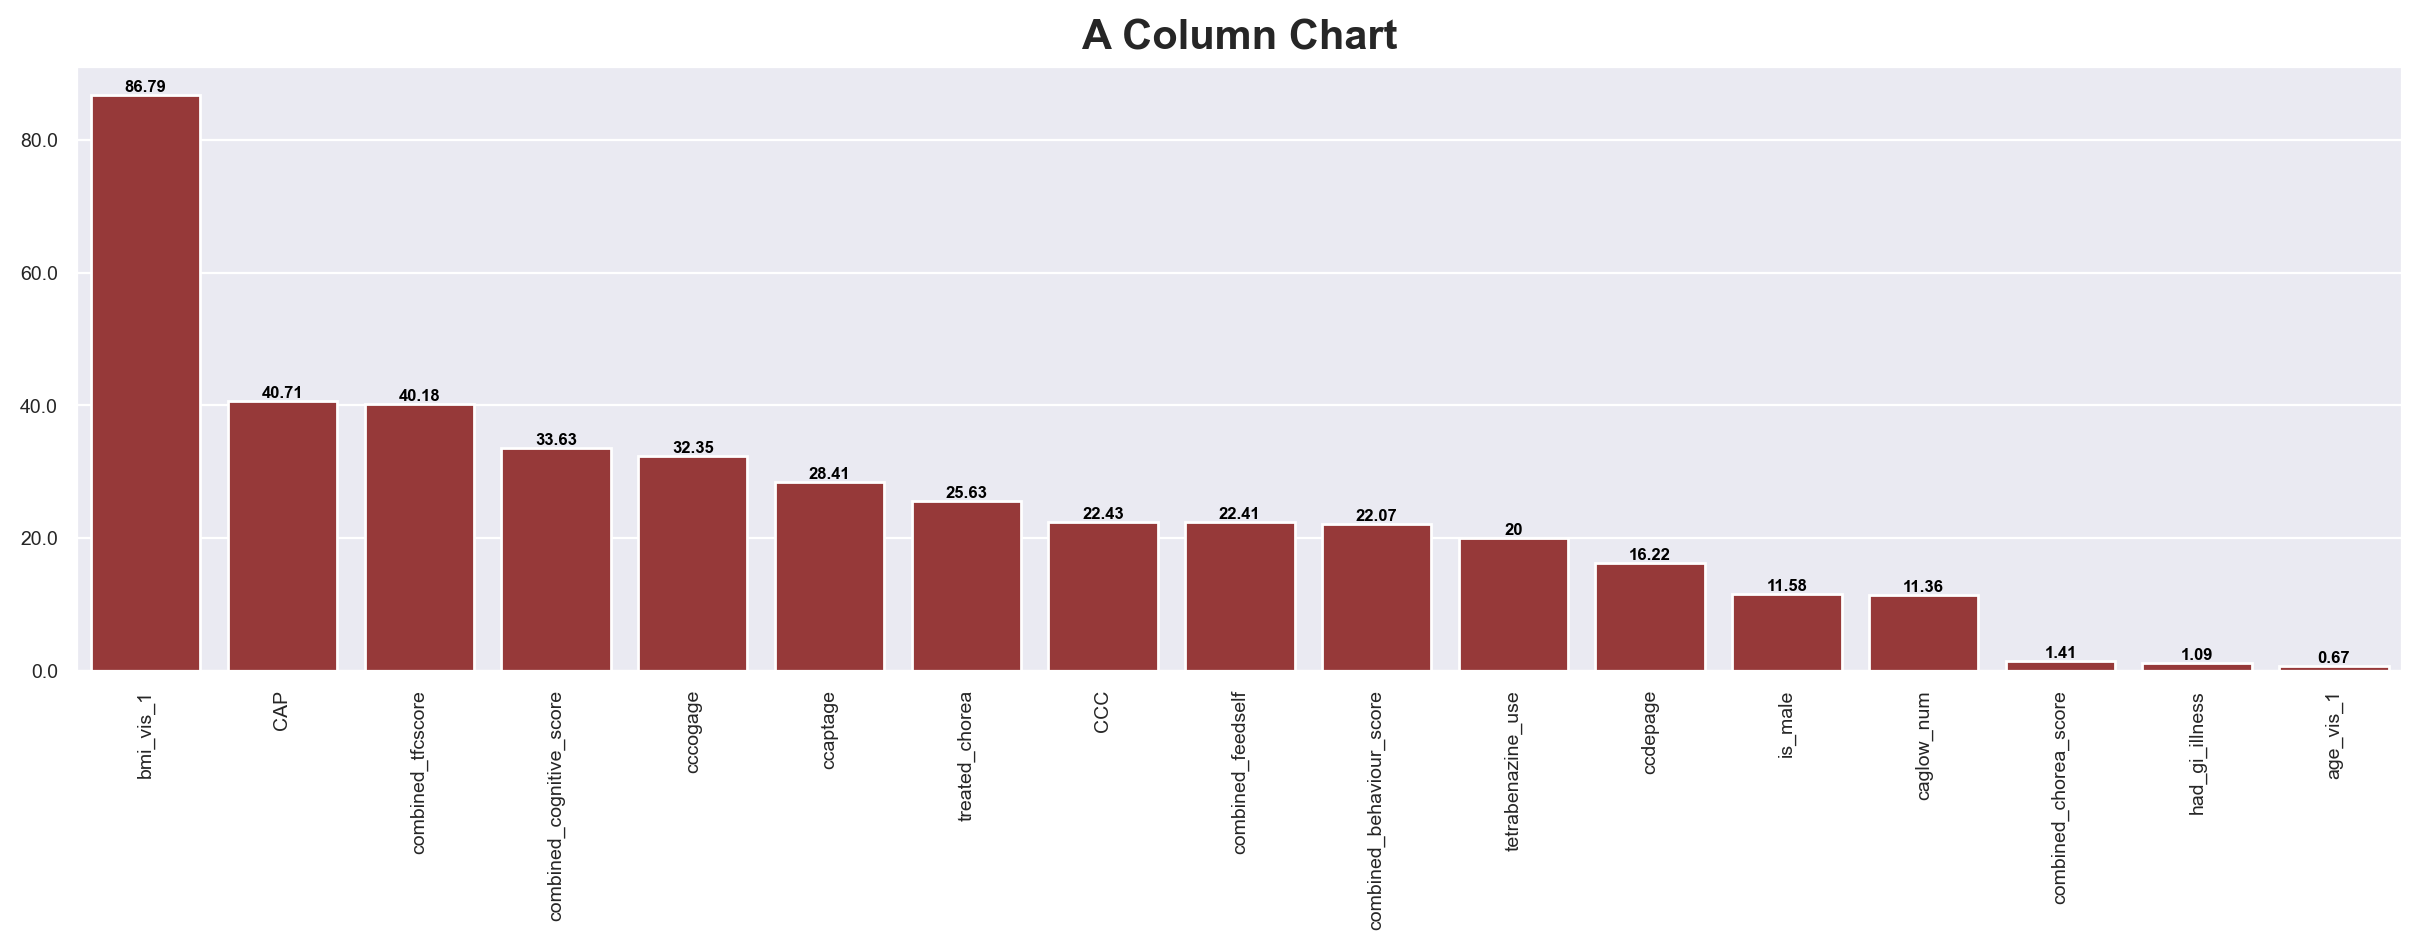

In [45]:
corrn = proj.corr_with_pearson(sc_xtrain, y_train)
display(corrn)
proj.plot_column(corrn.index, corrn, color='brown', bot_labe_color='black', figsize=(15, 4), rotate_xticklabe=90)

In [46]:
train_feats = corrn.iloc[:18].index
sc_xtrain = sc_xtrain[train_feats]
sc_xtest = sc_xtest[train_feats]
display(sc_xtrain)

,bmi_vis_1,CAP,combined_tfcscore,combined_cognitive_score,cccogage,ccaptage,treated_chorea,CCC,combined_feedself,combined_behaviour_score,tetrabenazine_use,ccdepage,is_male,caglow_num,combined_chorea_score,had_gi_illness,age_vis_1
0,0.10,0.54,0.85,0.56,0.65,0.00,0.0,0.75,1.0,0.26,0.0,0.60,0.00,0.30,1.43e-04,0.0,0.34
1,0.27,0.73,0.58,0.44,0.77,0.75,0.0,1.00,1.0,0.01,0.0,0.70,1.00,0.90,6.78e-04,1.0,0.60
2,0.30,0.50,0.65,0.37,0.49,0.00,1.0,0.75,1.0,0.28,1.0,0.23,0.00,0.45,5.95e-04,0.0,0.23
3,0.13,0.34,0.75,0.41,0.00,0.37,1.0,0.75,1.0,0.02,0.0,0.43,1.00,0.55,1.55e-04,0.0,0.04
4,0.17,0.80,0.32,0.10,0.85,0.82,1.0,1.00,1.0,0.29,1.0,0.84,1.00,0.45,9.16e-04,1.0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,0.65,0.29,1.00,0.48,0.00,0.00,0.0,0.18,1.0,0.02,0.0,0.43,0.00,0.40,0.00e+00,0.0,0.63
1156,0.62,0.18,1.00,0.76,0.00,0.00,0.0,0.50,1.0,0.02,0.0,0.05,0.90,0.40,3.71e-06,0.1,0.53
1157,0.59,0.16,0.99,0.77,0.00,0.00,0.0,0.50,1.0,0.11,0.0,0.00,0.64,0.40,0.00e+00,0.0,0.48
1158,0.52,0.11,1.00,0.77,0.00,0.00,0.0,0.50,1.0,0.05,0.0,0.00,0.21,0.40,0.00e+00,0.0,0.29


### Imbalanced Class Distribution

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Fifth Follow-up BMI Class Distribution'}>

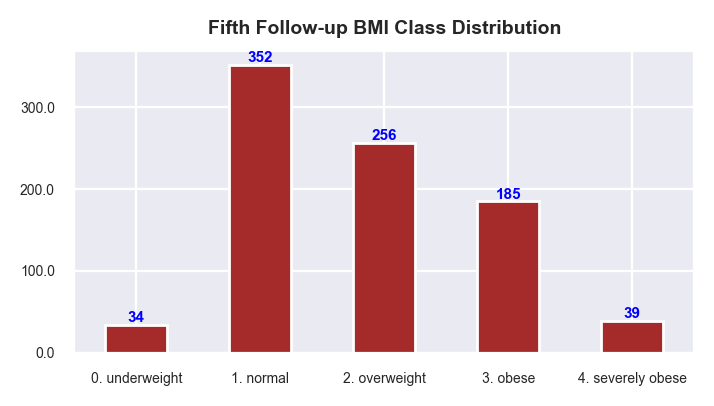

In [47]:
fig, ax1 = plt.subplots(figsize=[4, 2], dpi=200)

cols = 'bmi_level_vis_6'
y_cat.value_counts().sort_index().plot(kind='bar', color='brown', ax=ax1)
proj.adjust_axis(axis=ax1, plot_title="Fifth Follow-up BMI Class Distribution",
                 title_size=7, annotate=True, annot_size=5.5)

#### Class Distribution of Training & Test Set

<AxesSubplot:title={'center':'Fifth Follow-up BMI Class Distribution\n(Test Set)'}>

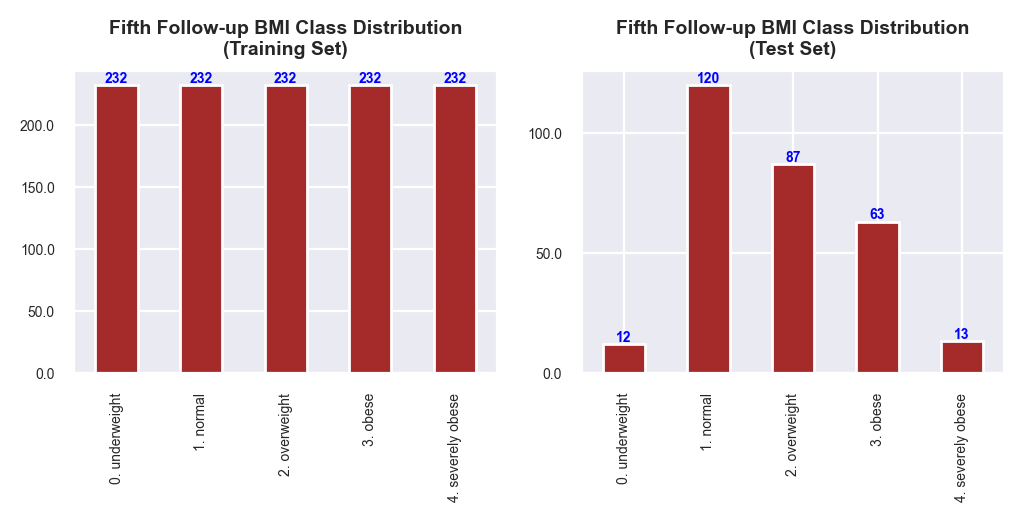

In [48]:
guide = {v:k for k, v in proj.bmi_lvl_guide.items()}

fig, (l, r) = plt.subplots(1, 2, figsize=[6, 2], dpi=200)
y_train.map(guide).value_counts().sort_index().plot(kind='bar', color='brown', ax=l)
proj.adjust_axis(axis=l, plot_title="Fifth Follow-up BMI Class Distribution\n(Training Set)",
                 title_size=7, annotate=True, annot_size=5, rotate_xticklabe=90)

cols = 'bmi_level_vis_6'
y_test.map(guide).value_counts().sort_index().plot(kind='bar', color='brown', ax=r)
proj.adjust_axis(axis=r, plot_title="Fifth Follow-up BMI Class Distribution\n(Test Set)",
                 title_size=7, annotate=True, annot_size=5, rotate_xticklabe=90)

In [49]:
display(sc_xtrain, y_train)

,bmi_vis_1,CAP,combined_tfcscore,combined_cognitive_score,cccogage,ccaptage,treated_chorea,CCC,combined_feedself,combined_behaviour_score,tetrabenazine_use,ccdepage,is_male,caglow_num,combined_chorea_score,had_gi_illness,age_vis_1
0,0.10,0.54,0.85,0.56,0.65,0.00,0.0,0.75,1.0,0.26,0.0,0.60,0.00,0.30,1.43e-04,0.0,0.34
1,0.27,0.73,0.58,0.44,0.77,0.75,0.0,1.00,1.0,0.01,0.0,0.70,1.00,0.90,6.78e-04,1.0,0.60
2,0.30,0.50,0.65,0.37,0.49,0.00,1.0,0.75,1.0,0.28,1.0,0.23,0.00,0.45,5.95e-04,0.0,0.23
3,0.13,0.34,0.75,0.41,0.00,0.37,1.0,0.75,1.0,0.02,0.0,0.43,1.00,0.55,1.55e-04,0.0,0.04
4,0.17,0.80,0.32,0.10,0.85,0.82,1.0,1.00,1.0,0.29,1.0,0.84,1.00,0.45,9.16e-04,1.0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,0.65,0.29,1.00,0.48,0.00,0.00,0.0,0.18,1.0,0.02,0.0,0.43,0.00,0.40,0.00e+00,0.0,0.63
1156,0.62,0.18,1.00,0.76,0.00,0.00,0.0,0.50,1.0,0.02,0.0,0.05,0.90,0.40,3.71e-06,0.1,0.53
1157,0.59,0.16,0.99,0.77,0.00,0.00,0.0,0.50,1.0,0.11,0.0,0.00,0.64,0.40,0.00e+00,0.0,0.48
1158,0.52,0.11,1.00,0.77,0.00,0.00,0.0,0.50,1.0,0.05,0.0,0.00,0.21,0.40,0.00e+00,0.0,0.29


0       1
1       2
2       1
3       1
4       1
       ..
1155    4
1156    4
1157    4
1158    4
1159    4
Name: bmi_level_vis_6, Length: 1160, dtype: int32

# Supervised Learning

## Using Sklearn Algorithms

### Logisitic Regression (GLM)

In [50]:
# compute class weights for imbalanced classes
cw = proj.compute_balanced_weights(y_train, as_samp_weights=False)
cw

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}

In [51]:
# reduced_xtrain, reduced_xtest, comps = proj.reduce_train_test_dims(sc_xtrain, sc_xtest)
# display(reduced_xtrain, reduced_xtest)

In [52]:
np.logspace(0, 1,10 ).round(2)

array([ 1.  ,  1.29,  1.67,  2.15,  2.78,  3.59,  4.64,  5.99,  7.74,
       10.  ])

In [53]:
base_glm = s_lm.LogisticRegression(class_weight=cw, random_state=101, max_iter=1e6,
                                   n_jobs=-1, verbose=2)

In [54]:
st = timeit.time.time()
base_glm.fit(sc_xtrain, y_train)
et = timeit.time.time()
duration = (et - st)/60
print('Duration (in minutes):')
display(duration)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Duration (in minutes):


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.4s finished


0.07492171923319499

              precision    recall  f1-score   support

           0       0.14      0.67      0.23        12
           1       0.58      0.33      0.42       120
           2       0.44      0.43      0.43        87
           3       0.48      0.43      0.45        63
           4       0.33      0.77      0.47        13

    accuracy                           0.41       295
   macro avg       0.40      0.52      0.40       295
weighted avg       0.49      0.41      0.42       295



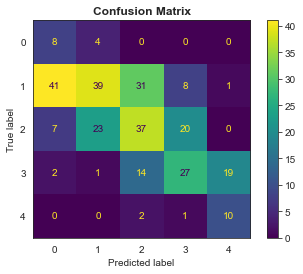

In [55]:
preds = base_glm.predict(sc_xtest)
proj.report_with_conf_matrix(y_test, preds)


Model Coefficients per Target Outcome:


,bmi_vis_1,CAP,combined_tfcscore,combined_cognitive_score,cccogage,ccaptage,treated_chorea,CCC,combined_feedself,combined_behaviour_score,tetrabenazine_use,ccdepage,is_male,caglow_num,combined_chorea_score,had_gi_illness,age_vis_1,intercept
0,-7.66,2.05,-1.35e+00,-0.61,-0.24,0.51,0.17,-1.01,0.22,-0.18,6.96e-03,-0.96,-0.23,0.86,-0.66,0.11,-2.19,3.69
1,-5.05,1.38,-1.51e-03,0.73,0.35,0.15,0.13,-0.47,-0.19,-0.08,-7.26e-02,0.05,-0.03,-0.22,0.41,-0.31,0.30,1.26
2,-1.51,-1.58,-1.89e-01,1.44,1.10,1.16,-0.16,-0.34,-0.07,-0.09,-1.71e-01,0.49,0.60,-0.48,0.24,0.20,0.87,0.26
3,3.99,-2.14,1.25e+00,-0.75,0.51,-0.26,0.44,0.63,-0.12,1.01,-4.46e-01,-0.07,0.28,-0.12,0.19,0.06,1.67,-1.75
4,10.23,0.29,2.93e-01,-0.80,-1.71,-1.56,-0.57,1.19,0.15,-0.66,6.83e-01,0.49,-0.62,-0.04,-0.18,-0.05,-0.65,-3.46


No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


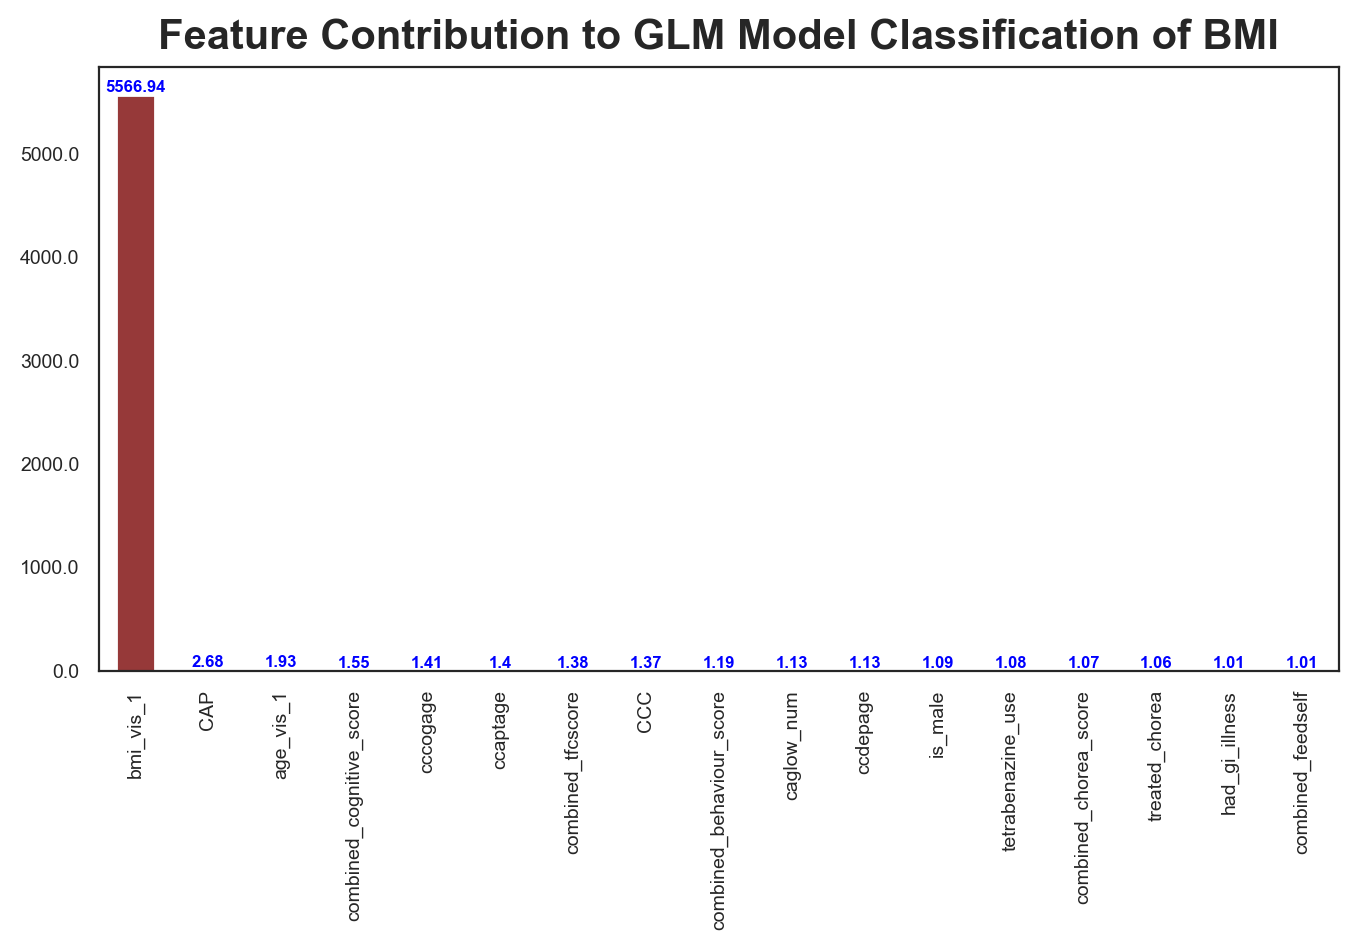

In [56]:
feat_importance = proj.get_coeff_importance(base_glm, plot_title="Feature Contribution to GLM Model Classification of BMI")

baseline BMI                5566.94
CAP                            2.68
baseline age                   1.93
combined_cognitive_score       1.55
cccogage                       1.41
ccaptage                       1.40
combined_tfcscore              1.38
CCC                            1.37
combined_behaviour_score       1.19
caglow_num                     1.13
ccdepage                       1.13
is_male                        1.09
tetrabenazine_use              1.08
combined_chorea_score          1.07
treated_chorea                 1.06
had_gi_illness                 1.01
combined_feedself              1.01
dtype: float64

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2281: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(np.round(axis.get_xticks(), precision), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Feature Contribution to GLM Model Classification of BMI'}, xlabel='model coefficient'>

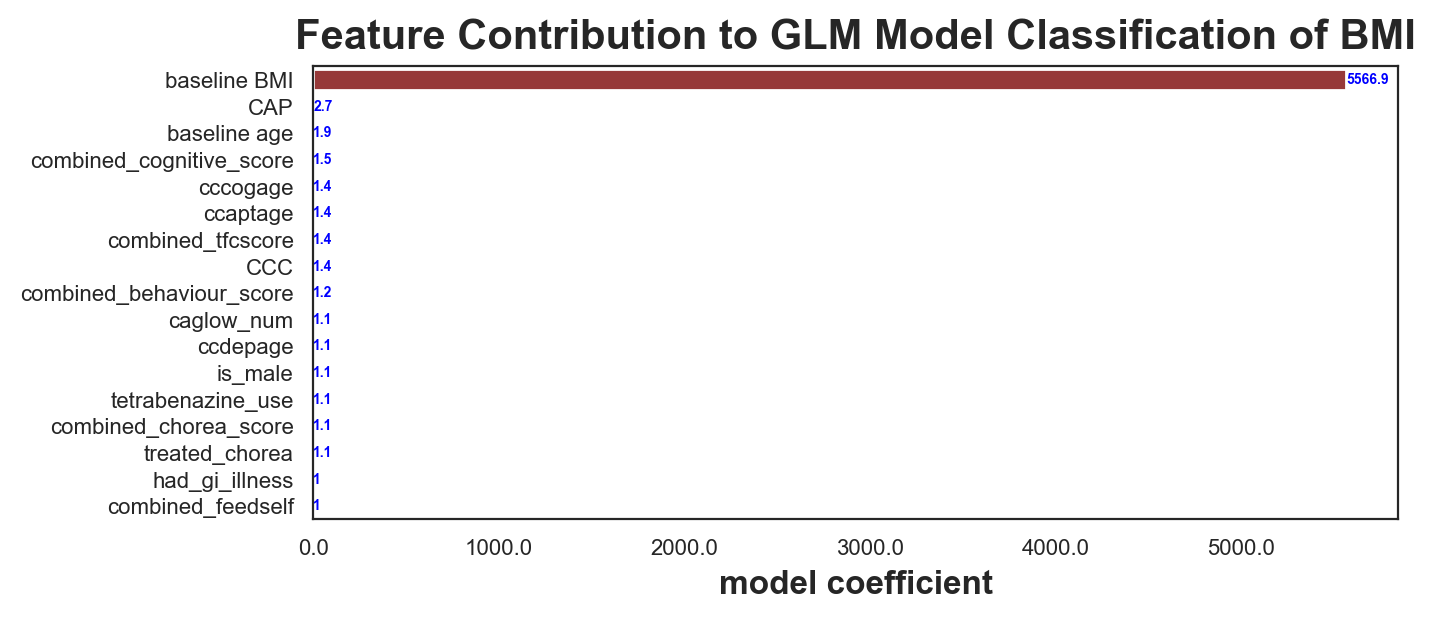

In [57]:
guide = {x:'baseline BMI' if x == 'bmi_vis_1' else 'baseline age' if x == 'age_vis_1' else
         'baseline BMI outcome' if x == 'bmi_outcome_vis_1' else 'baseline independent feeding' 
         if x == 'independent_feeding_vis_1' else 'CAG repeats' if x == 'caghigh_num' 
         else 'history of motor impairment' if x == 'ccmtr' else 'history of apathy' if x == 'ccapt' 
         else x for x in feat_importance.index}
feat_importance.index = feat_importance.index.map(guide)
display(feat_importance)
x, y = feat_importance.index, feat_importance

fig, ax1 = plt.subplots(figsize=[7, 3], dpi=200)
proj.plot_bar(axis=ax1, x=y.round(1), y=x, annotate=True, precision=1, color='brown',
              plot_title="Feature Contribution to GLM Model Classification of BMI",
             x_labe='model coefficient', xy_ticksize=8, xy_labe_size=12, annot_size=5)

In [58]:
metr = ['precision', 'recall', 'f1-score']
labes = sorted(y_cat.unique())
display(labes)
glm_perf_result = pd.DataFrame(s_mtr.classification_report(y_test, preds, target_names=labes, output_dict=True)).loc[metr, labes].T
glm_perf_result

['0. underweight',
 '1. normal',
 '2. overweight',
 '3. obese',
 '4. severely obese']

,precision,recall,f1-score
0. underweight,0.14,0.67,0.23
1. normal,0.58,0.33,0.42
2. overweight,0.44,0.43,0.43
3. obese,0.48,0.43,0.45
4. severely obese,0.33,0.77,0.47


### SVM

In [59]:
base_svm = svm.SVC(random_state=101, class_weight=cw, verbose=True,)

In [60]:
st = timeit.time.time()
base_svm.fit(sc_xtrain, y_train)
et = timeit.time.time()
duration = (et - st)/60
print('Duration (in minutes):')
display(duration)

[LibSVM]Duration (in minutes):


0.002000280221303304

              precision    recall  f1-score   support

           0       0.11      0.17      0.13        12
           1       0.57      0.55      0.56       120
           2       0.40      0.48      0.44        87
           3       0.68      0.40      0.50        63
           4       0.53      0.77      0.62        13

    accuracy                           0.49       295
   macro avg       0.46      0.47      0.45       295
weighted avg       0.52      0.49      0.50       295



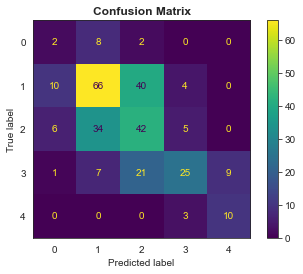

In [61]:
preds = base_svm.predict(sc_xtest)
proj.report_with_conf_matrix(y_test, preds)

In [62]:
metr = ['precision', 'recall', 'f1-score']
labes = sorted(y_cat.unique())
display(labes)
svm_perf_result = pd.DataFrame(s_mtr.classification_report(y_test, preds, target_names=labes, output_dict=True)).loc[metr, labes].T
svm_perf_result

['0. underweight',
 '1. normal',
 '2. overweight',
 '3. obese',
 '4. severely obese']

,precision,recall,f1-score
0. underweight,0.11,0.17,0.13
1. normal,0.57,0.55,0.56
2. overweight,0.40,0.48,0.44
3. obese,0.68,0.40,0.50
4. severely obese,0.53,0.77,0.62


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Evaluation of Untuned SVM Classifier'}, xlabel='Evaluation Metric', ylabel='Score'>

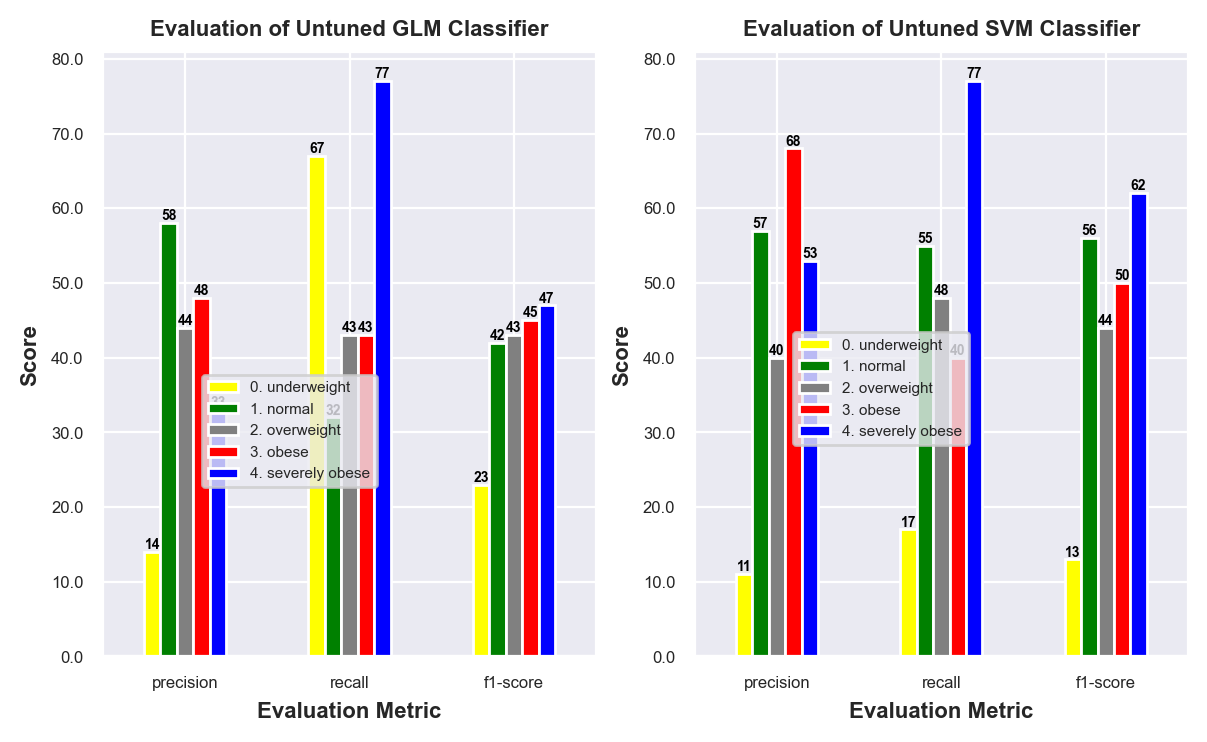

In [63]:
sns.set_style(style='darkgrid')

fig, (l, r) = plt.subplots(1, 2, figsize=[7, 4], dpi=200)
glm_perf_result.round(2).apply(lambda x: 100*x).T.plot(kind='bar', ax=l, color=proj.bmi_level_cmap)
proj.adjust_axis(l, plot_title="Evaluation of Untuned GLM Classifier", title_size=8, annotate=True,
                 bot_labe_color='black', annot_size=5, show_legend_at=[0.2, 0.28], legend_size=5.5,
                x_labe='Evaluation Metric', y_labe='Score', xy_ticksize=6)


svm_perf_result.round(2).apply(lambda x: 100*x).T.plot(kind='bar', ax=r, color=proj.bmi_level_cmap)
proj.adjust_axis(r, plot_title="Evaluation of Untuned SVM Classifier", title_size=8, annotate=True,
                 bot_labe_color='black', annot_size=5, show_legend_at=[0.2, 0.35], legend_size=5.5,
                 x_labe='Evaluation Metric', y_labe='Score', xy_ticksize=6)

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Untuned Model Test Accuracy'}>

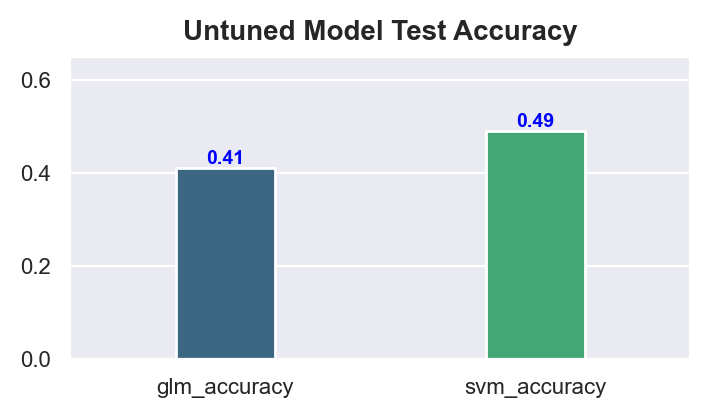

In [64]:
acc = pd.Series([base_glm.score(sc_xtest, y_test).round(2), base_svm.score(sc_xtest, y_test).round(2)],
                index=['glm_accuracy', 'svm_accuracy'])
proj.plot_column(acc.index, acc, reduce_barw_by=2.5, annot_size=7,
                plot_title="Untuned Model Test Accuracy", title_size=10,
                 xy_ticksize=8, figsize=[4, 2], ylim=[0, 0.65])

In [65]:
# feat_importance = proj.get_coeff_importance(model, plot_title="Feature Contribution to GLM Model Classification of BMI")

In [66]:
# guide = {x:'baseline BMI' if x == 'bmi_vis_1' else 'baseline age' if x == 'age_vis_1' else
#          'baseline BMI outcome' if x == 'bmi_outcome_vis_1' else 'baseline independent feeding' 
#          if x == 'independent_feeding_vis_1' else 'CAG repeats' if x == 'caghigh_num' 
#          else 'history of motor impairment' if x == 'ccmtr' else 'history of apathy' if x == 'ccapt' 
#          else x for x in feat_importance.index}
# feat_importance.index = feat_importance.index.map(guide)
# display(feat_importance)
# x, y = feat_importance.index, feat_importance

# fig, ax1 = plt.subplots(figsize=[10, 3], dpi=200)
# proj.plot_bar(axis=ax1, x=y.round(1), y=x, annotate=True, precision=1, color='brown',
#               plot_title="Feature Contribution to SVM Model Classification of BMI",
#              x_labe='model coefficient', xy_ticksize=8, xy_labe_size=12, annot_size=5,)
# #              xlim=[0, 30000])

### Grid Search For Optimal Hyperparameters

#### GLM

In [67]:
cw

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}

In [68]:
parameters = {'C':[7.5, 10, 12],
             'multi_class':['ovr', 'multinomial']}

model = s_lm.LogisticRegression(random_state=101, class_weight=cw, solver='saga',
                                max_iter=1e6, n_jobs=-1, penalty='l1')
glm_grid = s_ms.GridSearchCV(estimator=model, param_grid=parameters, verbose=3,
                            scoring='accuracy')

In [69]:
# training with grid search
st = timeit.time.time()
glm_grid.fit(sc_xtrain, y_train)
et = timeit.time.time()
duration = (et - st)/60
print('Duration (in minutes):')
display(duration,
       glm_grid.best_estimator_,
       glm_grid.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ............C=7.5, multi_class=ovr;, score=0.578 total time=   1.3s
[CV 2/5] END ............C=7.5, multi_class=ovr;, score=0.629 total time=   0.1s
[CV 3/5] END ............C=7.5, multi_class=ovr;, score=0.616 total time=   0.1s
[CV 4/5] END ............C=7.5, multi_class=ovr;, score=0.638 total time=   0.1s
[CV 5/5] END ............C=7.5, multi_class=ovr;, score=0.647 total time=   0.1s
[CV 1/5] END ....C=7.5, multi_class=multinomial;, score=0.642 total time=   1.5s
[CV 2/5] END ....C=7.5, multi_class=multinomial;, score=0.707 total time=   1.8s
[CV 3/5] END ....C=7.5, multi_class=multinomial;, score=0.659 total time=   1.4s
[CV 4/5] END ....C=7.5, multi_class=multinomial;, score=0.741 total time=   1.4s
[CV 5/5] END ....C=7.5, multi_class=multinomial;, score=0.746 total time=   1.4s
[CV 1/5] END .............C=10, multi_class=ovr;, score=0.578 total time=   0.2s
[CV 2/5] END .............C=10, multi_class=ovr;,

0.37558351357777914

LogisticRegression(C=10, class_weight={0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0},
                   max_iter=1000000.0, multi_class='multinomial', n_jobs=-1,
                   penalty='l1', random_state=101, solver='saga')

0.7025862068965518

              precision    recall  f1-score   support

           0       0.14      0.58      0.23        12
           1       0.69      0.39      0.50       120
           2       0.53      0.63      0.58        87
           3       0.62      0.54      0.58        63
           4       0.50      0.77      0.61        13

    accuracy                           0.52       295
   macro avg       0.50      0.58      0.50       295
weighted avg       0.60      0.52      0.53       295



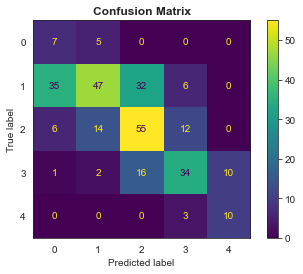

In [70]:
preds = glm_grid.predict(sc_xtest)
proj.report_with_conf_matrix(y_test, preds)


Model Coefficients per Target Outcome:


,bmi_vis_1,CAP,combined_tfcscore,combined_cognitive_score,cccogage,ccaptage,treated_chorea,CCC,combined_feedself,combined_behaviour_score,tetrabenazine_use,ccdepage,is_male,caglow_num,combined_chorea_score,had_gi_illness,age_vis_1,intercept
0,-24.08,2.36,-1.43,0.15,-0.01,0.83,0.08,-2.31,0.47,0.08,0.17,-1.66,-0.23,2.01,-3.32,0.14,-3.94,8.29
1,-14.85,0.52,0.00,0.78,0.00,0.00,0.00,-0.57,0.00,0.00,0.00,-0.70,0.00,0.00,0.00,-0.31,0.00,5.40
2,-3.64,-4.35,-0.41,0.00,0.80,0.86,-0.27,0.00,0.76,-0.05,-0.09,0.00,0.64,-0.18,0.32,0.12,1.62,3.19
3,13.57,-7.02,3.63,-4.82,0.70,-1.30,0.35,1.85,0.00,2.07,-0.11,0.31,0.35,0.69,0.00,0.00,3.43,-3.56
4,39.78,0.00,4.84,-5.38,-1.20,-8.83,-1.68,7.19,-4.17,-0.39,2.86,0.81,-1.15,-2.94,0.00,-0.54,-1.03,-13.31


No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


baseline BMI                3.78e+16
CCC                         2.68e+02
combined_tfcscore           3.31e+01
baseline age                7.44e+00
tetrabenazine_use           4.28e+00
CAP                         2.66e+00
combined_behaviour_score    2.33e+00
caglow_num                  2.26e+00
cccogage                    1.31e+00
ccaptage                    1.18e+00
combined_feedself           1.15e+00
is_male                     1.09e+00
ccdepage                    1.06e+00
had_gi_illness              9.18e-01
treated_chorea              8.92e-01
combined_chorea_score       8.84e-01
combined_cognitive_score    8.72e-01
dtype: float64

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2281: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(np.round(axis.get_xticks(), precision), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Feature Contribution to GLM Model Classification of BMI'}, xlabel='model coefficient'>

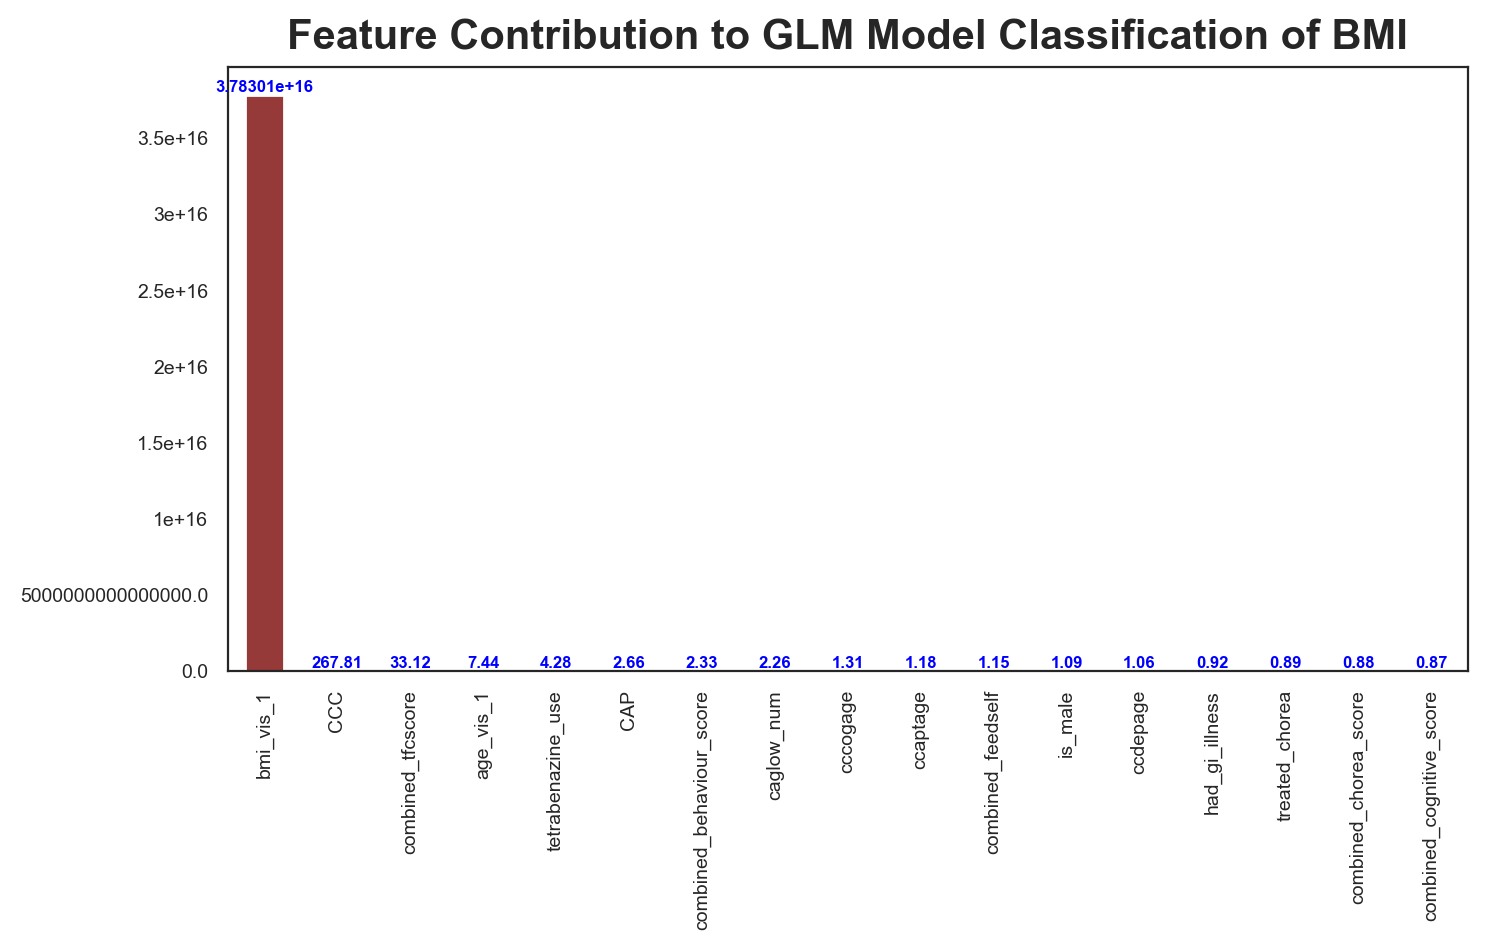

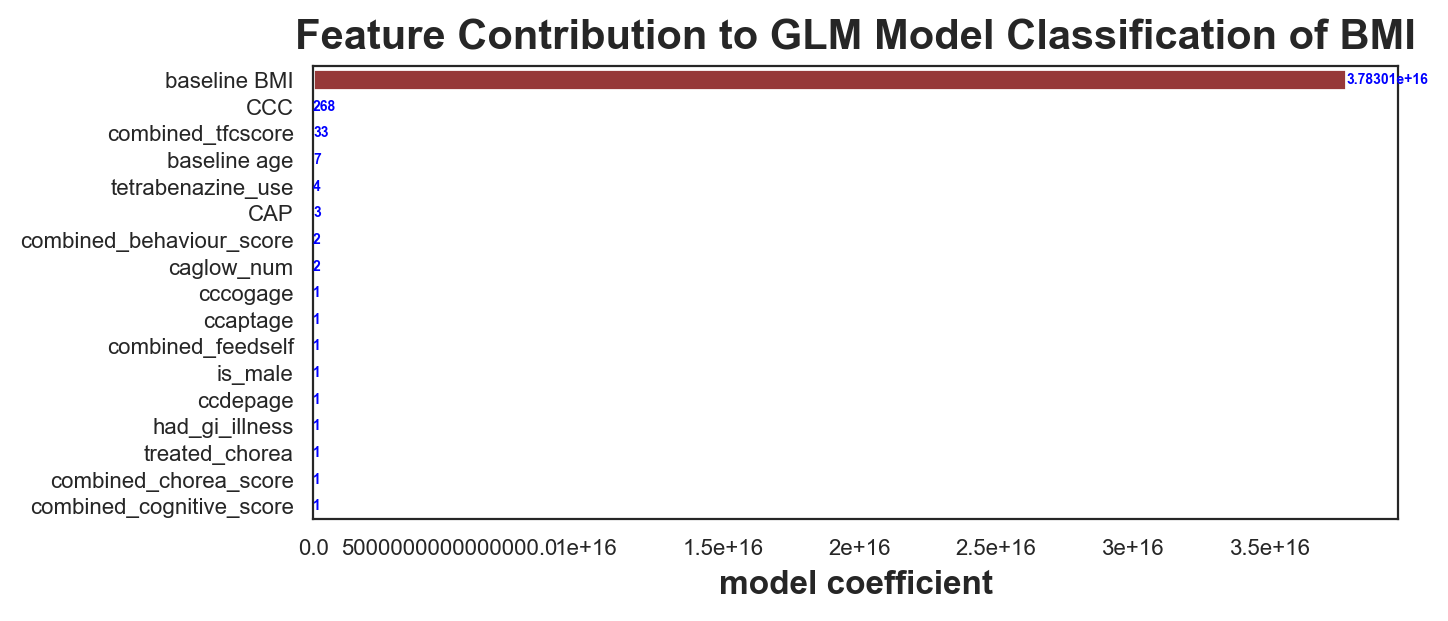

In [71]:
feat_importance = proj.get_coeff_importance(glm_grid.best_estimator_, plot_title="Feature Contribution to GLM Model Classification of BMI")

guide = {x:'baseline BMI' if x == 'bmi_vis_1' else 'baseline age' if x == 'age_vis_1' else
         'baseline BMI outcome' if x == 'bmi_outcome_vis_1' else 'baseline independent feeding' 
         if x == 'independent_feeding_vis_1' else 'CAG repeats' if x == 'caghigh_num' 
         else 'history of motor impairment' if x == 'ccmtr' else 'history of apathy' if x == 'ccapt' 
         else x for x in feat_importance.index}
feat_importance.index = feat_importance.index.map(guide)
display(feat_importance)
x, y = feat_importance.index, feat_importance

fig, ax1 = plt.subplots(figsize=[7, 3], dpi=200)
proj.plot_bar(axis=ax1, x=y.round(0), y=x, annotate=True, precision=1, color='brown',
              plot_title="Feature Contribution to GLM Model Classification of BMI",
             x_labe='model coefficient', xy_ticksize=8, xy_labe_size=12, annot_size=5,)

In [72]:
metr = ['precision', 'recall', 'f1-score']
labes = sorted(y_cat.unique())
display(labes)
grid_glm_perf = pd.DataFrame(s_mtr.classification_report(y_test, preds, target_names=labes, output_dict=True)).loc[metr, labes].T
grid_glm_perf

['0. underweight',
 '1. normal',
 '2. overweight',
 '3. obese',
 '4. severely obese']

,precision,recall,f1-score
0. underweight,0.14,0.58,0.23
1. normal,0.69,0.39,0.50
2. overweight,0.53,0.63,0.58
3. obese,0.62,0.54,0.58
4. severely obese,0.50,0.77,0.61


In [73]:
# save model to filesystem
# fname = 'best_glm_model.pkl'
# proj.save_python_obj(fname, glm_grid.best_estimator_)

#### Build best GLM model based on GridSearch best estimator

In [74]:
# load model from filesystem
fname = 'best_glm_model.pkl'

glm_best_model = proj.load_python_obj(fname)

Loading complete


In [75]:
st = timeit.time.time()
glm_best_model.fit(sc_xtrain, y_train)
et = timeit.time.time()
duration = (et - st)/60
print('Duration (in minutes):')
display(duration)

Duration (in minutes):


0.03849670092264811

              precision    recall  f1-score   support

           0       0.14      0.58      0.23        12
           1       0.70      0.39      0.50       120
           2       0.53      0.63      0.58        87
           3       0.62      0.56      0.59        63
           4       0.53      0.77      0.62        13

    accuracy                           0.52       295
   macro avg       0.50      0.59      0.50       295
weighted avg       0.60      0.52      0.54       295



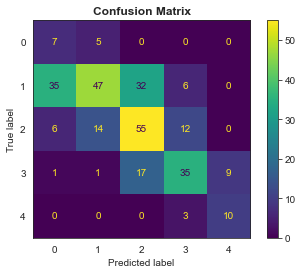

In [76]:
preds = glm_best_model.predict(sc_xtest)
# preds

proj.report_with_conf_matrix(y_test, preds)

#### SVM

In [77]:
np.arange(0, 1e6, 100).round(2),

(array([0.000e+00, 1.000e+02, 2.000e+02, ..., 9.997e+05, 9.998e+05,
        9.999e+05]),)

In [78]:
parameters = {'C':[7.5e2, 7.51e3],
              'tol':[1.2e-2, 1.3e-2],
             'gamma':['auto'],
              'decision_function_shape':['ovr'],
              'shrinking':[True, False],
             'coef0':[1e-4]}

model = svm.SVC(break_ties=True, random_state=101, class_weight=cw,)
svm_grid = s_ms.GridSearchCV(estimator=model, param_grid=parameters, verbose=3, 
                             scoring='accuracy')

In [79]:
# training with grid search
st = timeit.time.time()
svm_grid.fit(sc_xtrain, y_train)
et = timeit.time.time()
duration = (et - st)/60
print('Duration (in minutes):')
display(duration,
        svm_grid.best_score_,
       svm_grid.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END C=750.0, coef0=0.0001, decision_function_shape=ovr, gamma=auto, shrinking=True, tol=0.012;, score=0.767 total time=   0.0s
[CV 2/5] END C=750.0, coef0=0.0001, decision_function_shape=ovr, gamma=auto, shrinking=True, tol=0.012;, score=0.750 total time=   0.0s
[CV 3/5] END C=750.0, coef0=0.0001, decision_function_shape=ovr, gamma=auto, shrinking=True, tol=0.012;, score=0.797 total time=   0.0s
[CV 4/5] END C=750.0, coef0=0.0001, decision_function_shape=ovr, gamma=auto, shrinking=True, tol=0.012;, score=0.849 total time=   0.0s
[CV 5/5] END C=750.0, coef0=0.0001, decision_function_shape=ovr, gamma=auto, shrinking=True, tol=0.012;, score=0.884 total time=   0.0s
[CV 1/5] END C=750.0, coef0=0.0001, decision_function_shape=ovr, gamma=auto, shrinking=True, tol=0.013;, score=0.767 total time=   0.0s
[CV 2/5] END C=750.0, coef0=0.0001, decision_function_shape=ovr, gamma=auto, shrinking=True, tol=0.013;, score=0.750 total t

0.13098127047220867

0.8094827586206896

SVC(C=750.0, break_ties=True,
    class_weight={0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}, coef0=0.0001,
    gamma='auto', random_state=101, tol=0.012)

In [80]:
print(svm_grid.best_params_)
display(svm_grid.n_features_in_)

{'C': 750.0, 'coef0': 0.0001, 'decision_function_shape': 'ovr', 'gamma': 'auto', 'shrinking': True, 'tol': 0.012}


17

              precision    recall  f1-score   support

           0       0.33      0.17      0.22        12
           1       0.70      0.72      0.71       120
           2       0.54      0.60      0.57        87
           3       0.69      0.63      0.66        63
           4       0.67      0.62      0.64        13

    accuracy                           0.64       295
   macro avg       0.59      0.55      0.56       295
weighted avg       0.64      0.64      0.63       295



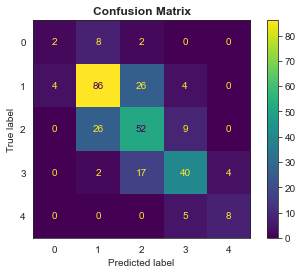

In [81]:
preds = svm_grid.predict(sc_xtest)
proj.report_with_conf_matrix(y_test, preds)

In [82]:
metr = ['precision', 'recall', 'f1-score']
labes = sorted(y_cat.unique())
display(labes)
grid_svm_perf = pd.DataFrame(s_mtr.classification_report(y_test, preds, target_names=labes, output_dict=True)).loc[metr, labes].T
grid_svm_perf

['0. underweight',
 '1. normal',
 '2. overweight',
 '3. obese',
 '4. severely obese']

,precision,recall,f1-score
0. underweight,0.33,0.17,0.22
1. normal,0.70,0.72,0.71
2. overweight,0.54,0.60,0.57
3. obese,0.69,0.63,0.66
4. severely obese,0.67,0.62,0.64


In [83]:
# # save model to filesystem
# fname = 'best_svm_model.pkl'
# proj.save_python_obj(fname, svm_grid.best_estimator_)

In [84]:
display(svm_grid.best_estimator_, svm_grid.best_params_)

SVC(C=750.0, break_ties=True,
    class_weight={0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}, coef0=0.0001,
    gamma='auto', random_state=101, tol=0.012)

{'C': 750.0,
 'coef0': 0.0001,
 'decision_function_shape': 'ovr',
 'gamma': 'auto',
 'shrinking': True,
 'tol': 0.012}

#### Build best SVM model based on GridSearch best estimator

In [85]:
# load model from filesystem
fname = 'best_svm_model.pkl'
svm_best_model = proj.load_python_obj(fname)

Loading complete


In [86]:
st = timeit.time.time()
svm_best_model.fit(sc_xtrain, y_train)
et = timeit.time.time()
duration = (et - st)/60
print('Duration (in minutes):')
display(duration)

Duration (in minutes):


0.0030834476153055825

              precision    recall  f1-score   support

           0       0.33      0.17      0.22        12
           1       0.70      0.72      0.71       120
           2       0.54      0.60      0.57        87
           3       0.69      0.63      0.66        63
           4       0.67      0.62      0.64        13

    accuracy                           0.64       295
   macro avg       0.59      0.55      0.56       295
weighted avg       0.64      0.64      0.63       295



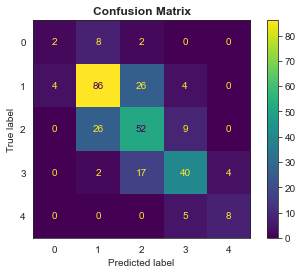

In [87]:
preds = svm_best_model.predict(sc_xtest)
preds

proj.report_with_conf_matrix(y_test, preds)

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Evaluation of Tuned SVM Classifier'}, xlabel='Evaluation Metric'>

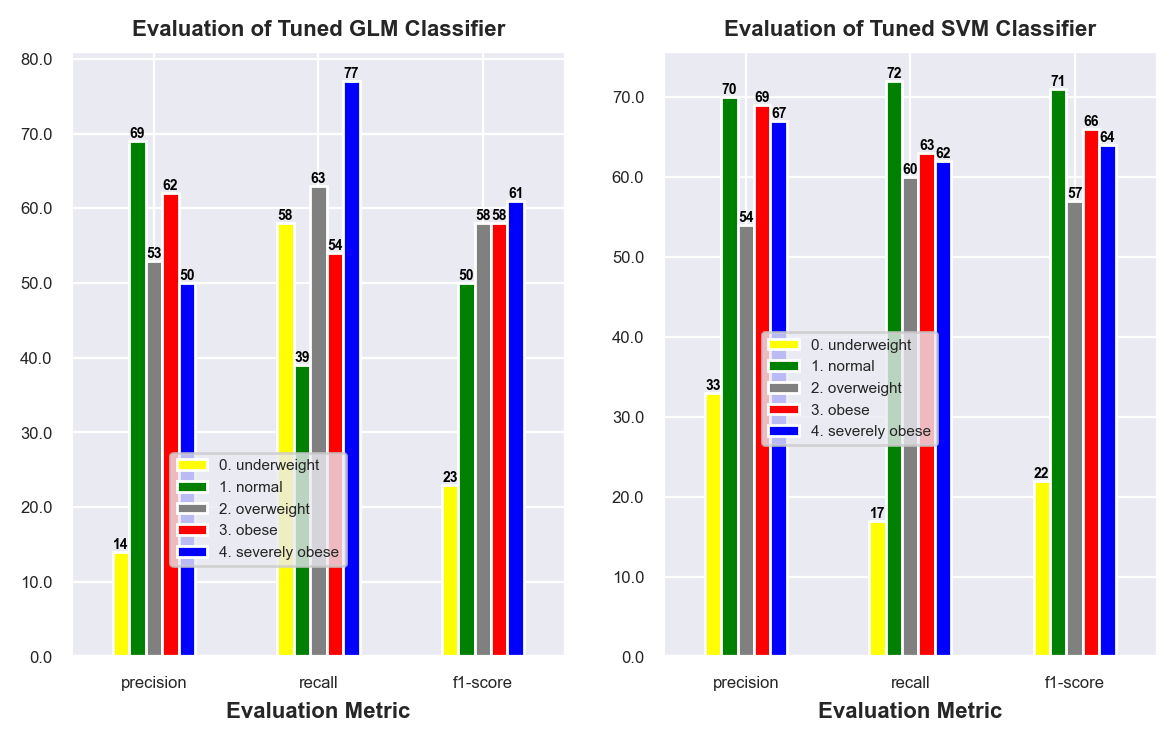

In [88]:
sns.set_style(style='darkgrid')

fig, (l, r) = plt.subplots(1, 2, figsize=[7, 4], dpi=200)
grid_glm_perf.round(2).apply(lambda x: 100*x).T.plot(kind='bar', ax=l, color=proj.bmi_level_cmap)
proj.adjust_axis(l, plot_title="Evaluation of Tuned GLM Classifier", title_size=8, annotate=True,
                 bot_labe_color='black', annot_size=5, show_legend_at=[0.2, 0.15], legend_size=5.5,
                x_labe='Evaluation Metric',  xy_ticksize=6)


grid_svm_perf.round(2).apply(lambda x: 100*x).T.plot(kind='bar', ax=r, color=proj.bmi_level_cmap)
proj.adjust_axis(r, plot_title="Evaluation of Tuned SVM Classifier", title_size=8, annotate=True,
                 bot_labe_color='black', annot_size=5, show_legend_at=[0.2, 0.35], legend_size=5.5,
                 x_labe='Evaluation Metric', xy_ticksize=6)

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Tuned Model Test Accuracy'}>

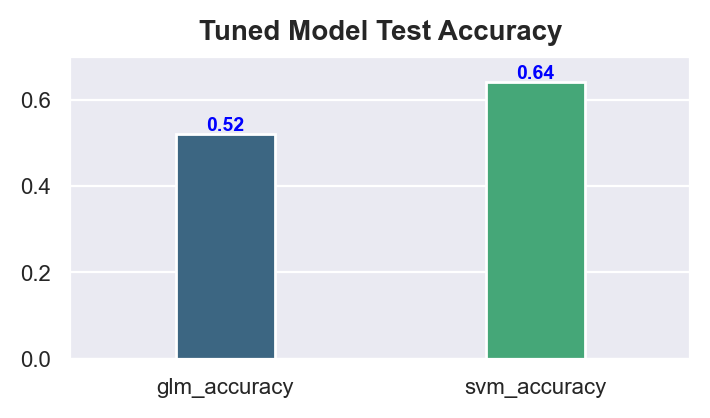

In [89]:
acc = pd.Series([glm_best_model.score(sc_xtest, y_test).round(2), svm_best_model.score(sc_xtest, y_test).round(2)],
                index=['glm_accuracy', 'svm_accuracy'])
proj.plot_column(acc.index, acc, reduce_barw_by=2.5, annot_size=7,
                plot_title="Tuned Model Test Accuracy", title_size=10,
                 xy_ticksize=8, figsize=[4, 2], ylim=[0, 0.7])

In [90]:
# feat_importance = proj.get_coeff_importance(best_model, plot_title="Feature Contribution to SVM Model Classification of BMI")

In [91]:
# guide = {x:'baseline BMI' if x == 'bmi_vis_1' else 'baseline age' if x == 'age_vis_1' else
#          'baseline BMI outcome' if x == 'bmi_outcome_vis_1' else 'baseline independent feeding' 
#          if x == 'independent_feeding_vis_1' else 'CAG repeats' if x == 'caghigh_num' 
#          else 'history of motor impairment' if x == 'ccmtr' else 'history of apathy' if x == 'ccapt' 
#          else x for x in feat_importance.index}
# feat_importance.index = feat_importance.index.map(guide)
# display(feat_importance)
# x, y = feat_importance.index, feat_importance

# fig, ax1 = plt.subplots(figsize=[10, 3], dpi=200)
# proj.plot_bar(axis=ax1, x=y.round(1), y=x, annotate=True, precision=1, color='brown',
#               plot_title="Feature Contribution to SVM Model Classification of BMI",
#              x_labe='model coefficient', xy_ticksize=8, xy_labe_size=12, annot_size=5,)
# #              xlim=[0, 30000])

In [92]:
stopt

NameError: name 'stopt' is not defined